In [195]:
library(ggplot2)
library(dplyr)
library(tidyverse)

In [77]:
# ggplot theme #
my_theme0 <- theme(panel.background = element_rect(fill = "transparent", 
                                                colour = NA), plot.background = element_rect(colour = 'NA', 
                                                                                             fill = 'transparent'),panel.grid.major=element_line(color=NA),
                axis.line=element_line(size=1.2,color="black"),
                axis.ticks=element_line(color="black"),
                axis.text=element_text(color="black",size=26),
                axis.title=element_text(color="black",size=30),
                panel.grid.minor = element_line(colour = NA),
                legend.text=element_text(size=17),legend.key=element_rect(fill="white"),
                legend.title=element_text(size=18,face="bold"),
                axis.text.x=element_text(angle=60,size=26,vjust=0.5),
                panel.border = element_rect(colour = "black", fill=NA, size=1),
                legend.position = "none")

my_theme1 <- theme_bw() + 
  theme(panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        text = element_text(size = 16),
        axis.title.x = element_text(size=18, color="black"), 
        axis.title.y = element_text(size=18, color="black"), 
        axis.text.x = element_text(angle = 0, hjust = 1, color="black"), 
        panel.grid.minor.x = element_line(colour = "grey", size=0.2, linetype = 'dashed'), 
        panel.grid.major.x = element_line(colour = "grey", size=0.2),
        panel.grid.minor.y = element_line(colour = "grey", size = 0.2, linetype = 'dashed'),
        panel.grid.major.y = element_line(colour = "grey", size=0.2),
        legend.position = "bottom", 
        legend.text=element_text(size=10), 
        legend.key.size = unit(1,"line"), 
        plot.margin=unit(c(1,1,1,1),"cm")
       ) 

* get percentages of HOT and BATS

In [190]:
pct_meta_file <- "/home/shengwei/GitHub/projects/bioGEOTRACES/05_MERGED_DEF_Counts_bamcov/DEF_MERGED_min_2000_pct_meta.tsv"
pct_meta_df <- read.table(pct_meta_file, header = T, sep = "\t", as.is = T, stringsAsFactors = F)
colnames(pct_meta_df)
GA02_pct_meta_df <- pct_meta_df %>%
  filter(GEOTRACES_Section == "GA02", TotalCnt >= 500) %>% 
  select(NCBI_SRA_Acc, Collection_Year, Collection_Month, Collection_Date, Cruise_Station, Latitude, Longitude, Depth, Total_Read_Pairs, Eukaryote:TotalCnt)
head(GA02_pct_meta_df, 2)

[1] "Sample_Name"                "Sample_ID"                 
 [3] "Cruise_Series"              "GEOTRACES_Section"         
 [5] "Cruise_ID"                  "Cruise_Station"            
 [7] "Collection_Date"            "Collection_Year"           
 [9] "Collection_Month"           "Collection_Time"           
[11] "Depth"                      "Env_Biome"                 
[13] "Env_Feature"                "Env_Material"              
[15] "Geo_Loc_Name"               "Latitude_Longitude"        
[17] "Latitude"                   "Longitude"                 
[19] "Bottle_ID"                  "NCBI_BioPrj"               
[21] "NCBI_SRA_Study"             "NCBI_BioSample"            
[23] "NCBI_SRA_Acc"               "Total_Read_Pairs"          
[25] "Total_Bases"                "NCBI_SRA_Accession_Contigs"
[27] "Assembly_Method"            "Eukaryote"                 
[29] "EukaryoteVirus"             "Plasmid"                   
[31] "Prokaryote"                 "ProkaryoteVirus"           
[33] "TotalCnt"

,NCBI_SRA_Acc,Collection_Year,Collection_Month,Collection_Date,Cruise_Station,Latitude,Longitude,Depth,Total_Read_Pairs,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,TotalCnt
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,SRR5788236,2010,5,5/10/2010,10,49.7225,-42.4467,10,17966852,14.15054,4.931701,35.31524,42.76000,2.842521,3228683
2,SRR5788235,2010,5,5/10/2010,10,49.7225,-42.4467,50,27207447,7.64326,3.626254,26.55195,54.50846,7.670078,14176778


* Calculate overall percentages among all clean reads

In [297]:
GA02_pct_meta_df2 <- GA02_pct_meta_df %>% 
  mutate(Eukaryote = Eukaryote * TotalCnt / Total_Read_Pairs) %>% 
  mutate(EukaryoteVirus = EukaryoteVirus * TotalCnt / Total_Read_Pairs) %>% 
  mutate(Plasmid = Plasmid * TotalCnt / Total_Read_Pairs) %>% 
  mutate(Prokaryote = Prokaryote * TotalCnt / Total_Read_Pairs) %>% 
  mutate(Prok_n_Plas = Prokaryote + Plasmid) %>% 
  mutate(ProkaryoteVirus = ProkaryoteVirus * TotalCnt / Total_Read_Pairs) 
head(GA02_pct_meta_df2, 2)

,NCBI_SRA_Acc,Collection_Year,Collection_Month,Collection_Date,Cruise_Station,Latitude,Longitude,Depth,Total_Read_Pairs,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,TotalCnt,Prok_n_Plas
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,SRR5788236,2010,5,5/10/2010,10,49.7225,-42.4467,10,17966852,2.542883,0.8862376,6.346226,7.684067,0.5108073,3228683,14.03029
2,SRR5788235,2010,5,5/10/2010,10,49.7225,-42.4467,50,27207447,3.982615,1.8895047,13.835223,28.402308,3.9965896,14176778,42.23753


* grouping latitude and depth ranges

In [298]:
table(GA02_pct_meta_df2$Latitude)
table(GA02_pct_meta_df2$Depth)


-49.5475 -48.9358  -46.907 -44.7117  -42.364 -39.9648 -37.8305 -35.0093 
       2        3        3        3        3        3        3        3 
 -32.092 -29.0538 -26.0867 -22.4732 -17.0173 -12.8957  -9.1608  -5.6667 
       2        3        3        3        2        3        3        3 
 -2.6505  -0.1915   9.5462  13.1623  16.8312  22.3411  24.7143  28.0905 
       3        3        5        5        5        5        5        5 
 31.6667  33.4334  34.3277  36.2067  37.5673   46.312  47.8007  49.7225 
       5        5        6        6        6        6        6        6 


  8   9  10  11  12  49  50  51  52  61  65  72  73  74  75  76  77  87  99 100 
  3   7  16   4   1   6  11   4   1   1   1   1   1   1   6   3   2   1   1   4 
101 102 103 119 127 135 143 148 149 150 151 152 153 198 199 200 201 202 
  3   1   2   1   1   1   1   1   6   9   7   4   1   1   3   3   5   2 

In [299]:
LatitudeRange_order <- rev(c("S50-S45", "S45-S40", "S40-S35", "S35-S30", "S30-S25", "S25-S20", "S20-S10", "S10-S0", 
                         "N0-N10", "N10-N20", "N20-N25", "N25-N30", "N30-N35", "N35-N40", "N45-N50"))
DepthRange_order <- c("D8-D12", "D49-D52", "D61-D80", "D87-D103", "D119-D153", "D198-D202")

GA02_pct_meta_df2 <- GA02_pct_meta_df2 %>% 
  mutate(LatitudeRange = case_when(Latitude>-50 & Latitude<= -45 ~ "S50-S45",
                                   Latitude>-45 & Latitude<= -40 ~ "S45-S40",
                                   Latitude>-40 & Latitude<= -35 ~ "S40-S35",
                                   Latitude>-35 & Latitude<= -30 ~ "S35-S30",
                                   Latitude>-30 & Latitude<= -25 ~ "S30-S25",
                                   Latitude>-25 & Latitude<= -20 ~ "S25-S20",
                                   Latitude>-20 & Latitude<= -10 ~ "S20-S10",
                                   Latitude>-10 & Latitude<= 0 ~ "S10-S0",
                                   Latitude>0 & Latitude<= 10 ~ "N0-N10",
                                   Latitude>10 & Latitude<= 20 ~ "N10-N20",
                                   Latitude>20 & Latitude<= 25 ~ "N20-N25",
                                   Latitude>25 & Latitude<= 30 ~ "N25-N30",
                                   Latitude>30 & Latitude<= 35 ~ "N30-N35",
                                   Latitude>35 & Latitude<= 40 ~ "N35-N40",
                                   Latitude>45 & Latitude<= 50 ~ "N45-N50")) %>%
  mutate(LatitudeRange = factor(LatitudeRange, levels = LatitudeRange_order)) %>%
  mutate(DepthRange = case_when(Depth>=8 & Depth<= 12 ~ "D8-D12",
                                Depth>=49 & Depth<= 52 ~ "D49-D52",
                                Depth>=61 & Depth<= 80 ~ "D61-D80",
                                Depth>=87 & Depth<= 103 ~ "D87-D103",
                                Depth>=119 & Depth<= 153 ~ "D119-D153",
                                Depth>=198 & Depth<= 202 ~ "D198-D202")) %>%
  mutate(DepthRange = factor(DepthRange, levels = DepthRange_order))
head(GA02_pct_meta_df2, 2)

,NCBI_SRA_Acc,Collection_Year,Collection_Month,Collection_Date,Cruise_Station,Latitude,Longitude,Depth,Total_Read_Pairs,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,TotalCnt,Prok_n_Plas,LatitudeRange,DepthRange
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>
1,SRR5788236,2010,5,5/10/2010,10,49.7225,-42.4467,10,17966852,2.542883,0.8862376,6.346226,7.684067,0.5108073,3228683,14.03029,N45-N50,D8-D12
2,SRR5788235,2010,5,5/10/2010,10,49.7225,-42.4467,50,27207447,3.982615,1.8895047,13.835223,28.402308,3.9965896,14176778,42.23753,N45-N50,D49-D52


In [300]:
GA02_pct_meta_df2.long <- GA02_pct_meta_df2 %>% 
  select(LatitudeRange, DepthRange, Eukaryote, EukaryoteVirus, Prok_n_Plas, ProkaryoteVirus) %>% 
  gather(Eukaryote:ProkaryoteVirus, key="Seq_Class", value="Percentage") %>% 
  mutate(Seq_Class = factor(Seq_Class, levels=c("Prok_n_Plas", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus"))) 

head(GA02_pct_meta_df2.long, 2)

,LatitudeRange,DepthRange,Seq_Class,Percentage
,<fct>,<fct>,<fct>,<dbl>
1,N45-N50,D8-D12,Eukaryote,2.542883
2,N45-N50,D49-D52,Eukaryote,3.982615


In [301]:
rects_7 <- data.frame(xmin = seq(1.5, 14, 2), 
                    xmax = seq(2.5, 15, 2))
rects_3 <- head(rects_7, 3)
rects_1 <- head(rects_7, 1)
head(rects_7, 2)

,xmin,xmax
,<dbl>,<dbl>
1,1.5,2.5
2,3.5,4.5


In [341]:
library(RColorBrewer)
col_4 <- brewer.pal(name="Paired", n=4)
#col_4 <- c("#daa520", "#0a75ad", "#8a2be2", "#047806")
col_4

[1] "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C"

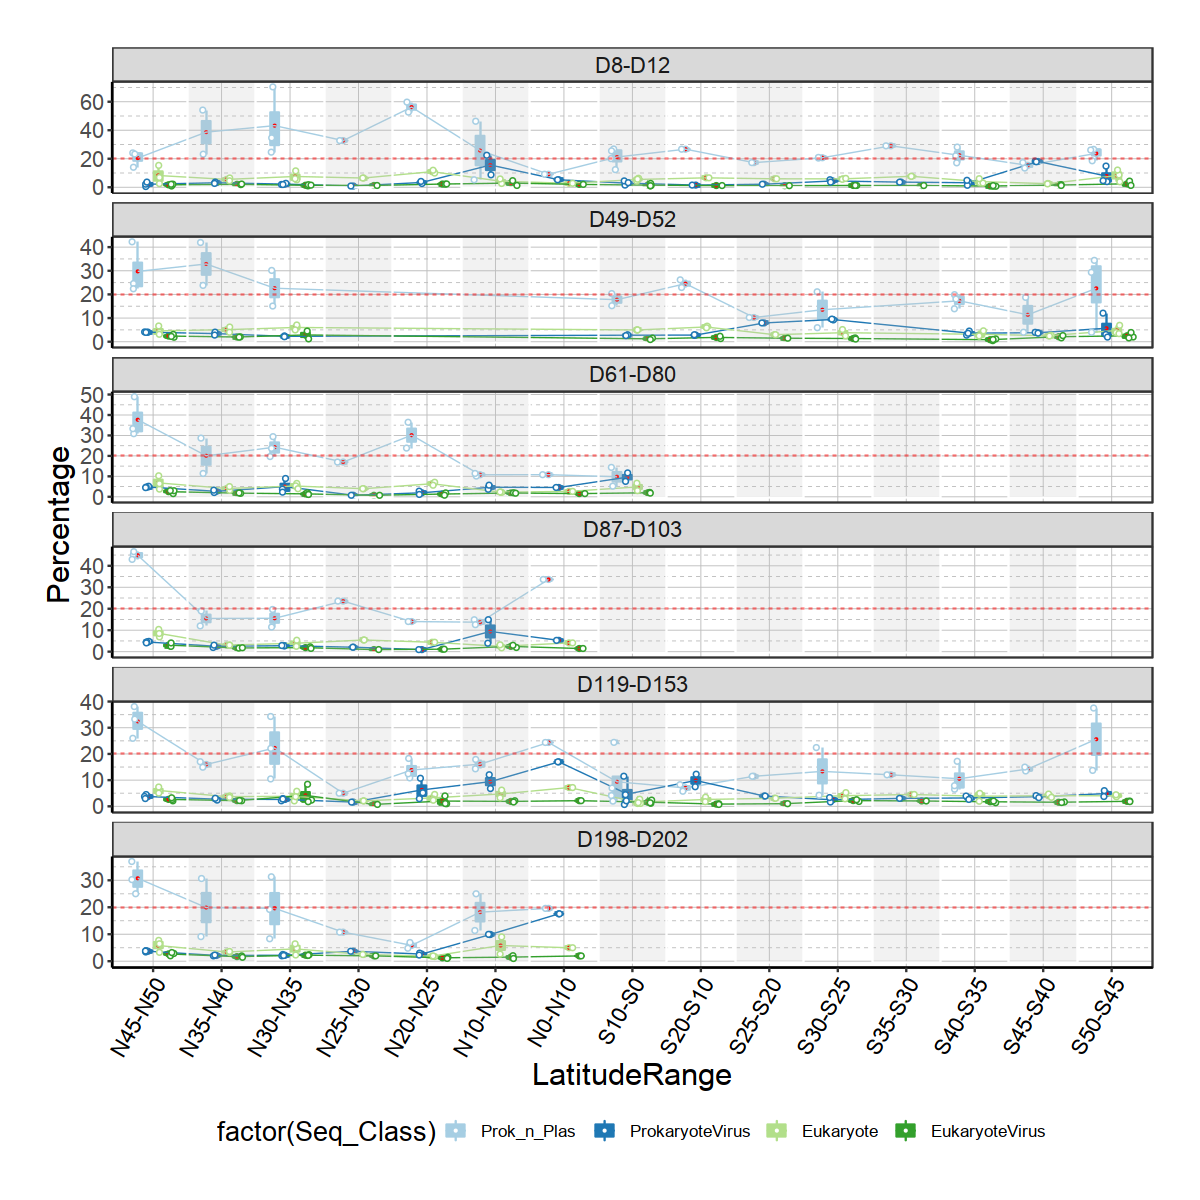

In [342]:
options(repr.plot.width=10, repr.plot.height=10)

p <- ggplot(data=GA02_pct_meta_df2.long, mapping=aes(x=LatitudeRange, y=Percentage, fill=factor(Seq_Class), color=factor(Seq_Class))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Seq_Class)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_7, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  facet_wrap(~DepthRange, nrow = 6,  scales='free_y') + 
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) 
p

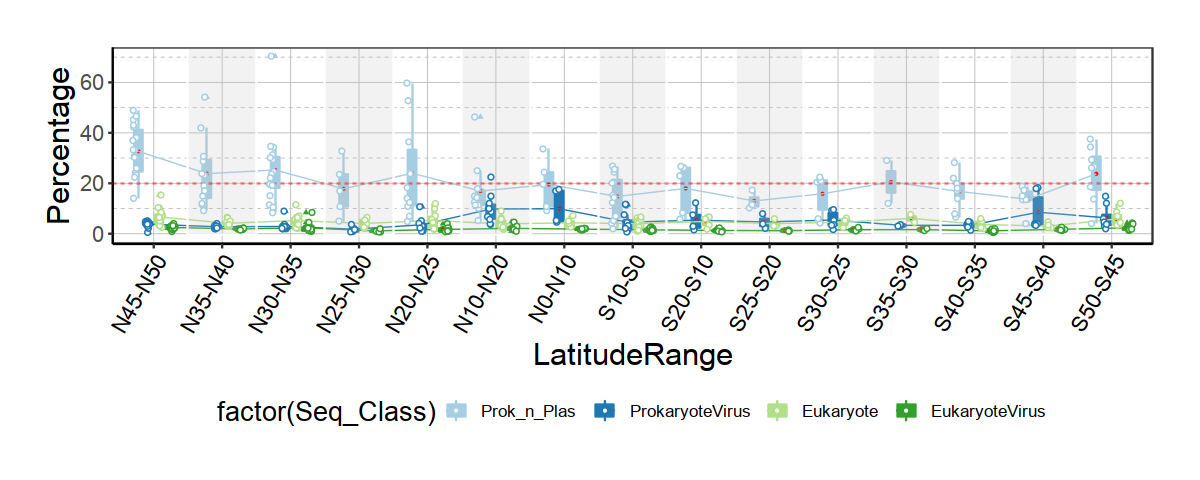

In [401]:
options(repr.plot.width=10, repr.plot.height=4)

p_2 <- ggplot(data=GA02_pct_meta_df2.long, mapping=aes(x=LatitudeRange, y=Percentage, fill=factor(Seq_Class),colour=factor(Seq_Class))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Seq_Class)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_7, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))
p_2

ggsave(filename="bioGEOTRACES_DEF_Class_Percentages_GA02_boxplot_v1.pdf", 
       plot = last_plot(), path="./", useDingbats=FALSE,
       scale = 1, width = 300, height = 100, units = "mm",
       dpi = 300, limitsize = FALSE)

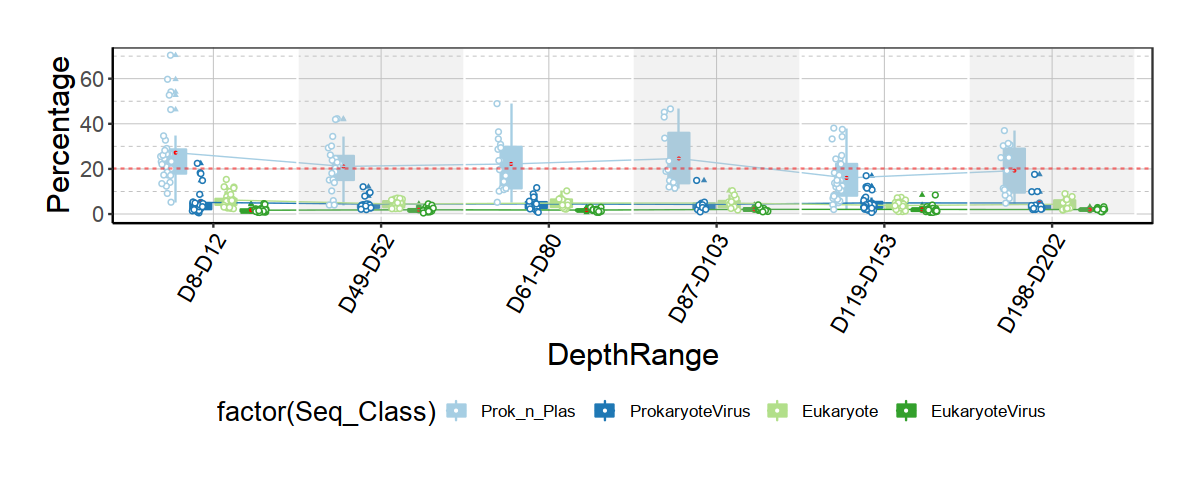

In [344]:
options(repr.plot.width=10, repr.plot.height=4)

p_3 <- ggplot(data=GA02_pct_meta_df2.long, mapping=aes(x=DepthRange, y=Percentage, fill=factor(Seq_Class),colour=factor(Seq_Class))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Seq_Class)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))
p_3

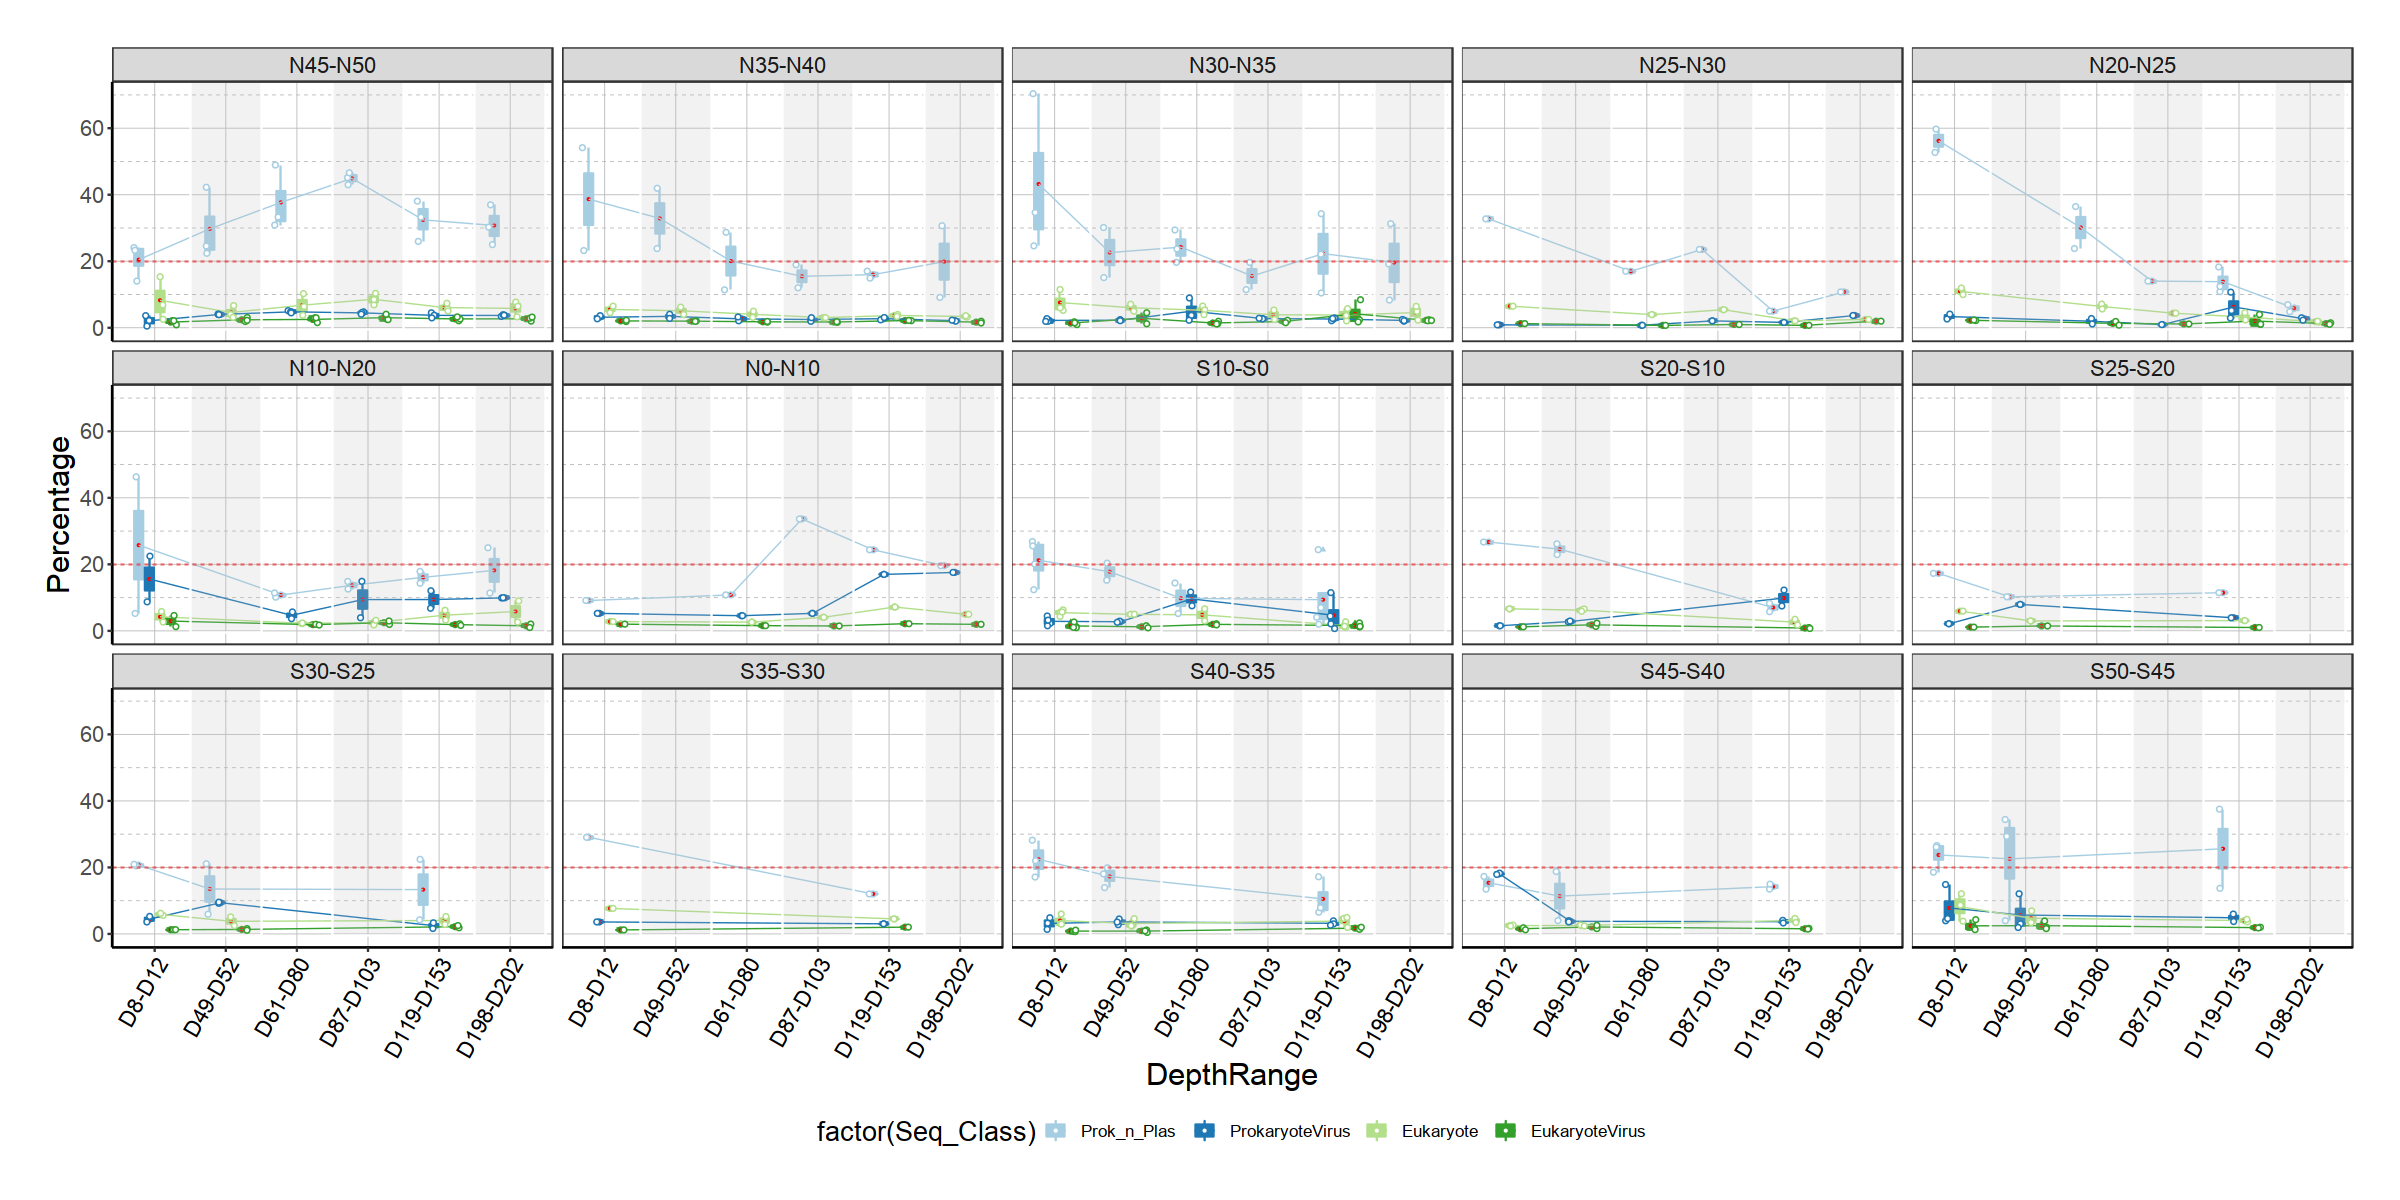

In [345]:
options(repr.plot.width=20, repr.plot.height=10)

p_4 <- ggplot(data=GA02_pct_meta_df2.long, mapping=aes(x=DepthRange, y=Percentage, fill=factor(Seq_Class), colour=factor(Seq_Class))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Seq_Class)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) + 
  facet_wrap(~LatitudeRange, nrow = 3)
p_4

In [153]:
## Gives count, mean, standard deviation, standard error of the mean, and confidence interval (default 95%).
##   data: a data frame.
##   measurevar: the name of a column that contains the variable to be summariezed
##   groupvars: a vector containing names of columns that contain grouping variables
##   na.rm: a boolean that indicates whether to ignore NA's
##   conf.interval: the percent range of the confidence interval (default is 95%)
summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=FALSE,
                      conf.interval=.95, .drop=TRUE) {
    library(plyr)

    # New version of length which can handle NA's: if na.rm==T, don't count them
    length2 <- function (x, na.rm=FALSE) {
        if (na.rm) sum(!is.na(x))
        else       length(x)
    }

    # This does the summary. For each group's data frame, return a vector with
    # N, mean, and sd
    datac <- ddply(data, groupvars, .drop=.drop,
      .fun = function(xx, col) {
        c(N    = length2(xx[[col]], na.rm=na.rm),
          mean = mean   (xx[[col]], na.rm=na.rm),
          sd   = sd     (xx[[col]], na.rm=na.rm)
        )
      },
      measurevar
    )

    # Rename the "mean" column    
    datac <- rename(datac, c("mean" = measurevar))

    datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean

    # Confidence interval multiplier for standard error
    # Calculate t-statistic for confidence interval: 
    # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
    ciMult <- qt(conf.interval/2 + .5, datac$N-1)
    datac$ci <- datac$se * ciMult

    return(datac)
}

In [154]:
GA02_pct_meta_df2.long.se <- summarySE(GA02_pct_meta_df2.long, measurevar="Percentage", groupvars=c("DepthRange","LatitudeRange", "Seq_Class"))
head(GA02_pct_meta_df2.long.se)

Warning message in qt(conf.interval/2 + 0.5, datac$N - 1):
“NaNs produced”


,DepthRange,LatitudeRange,Seq_Class,N,Percentage,sd,se,ci
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,D8-D12,N45-N50,Prok_n_Plas,3,20.472185,5.5935604,3.2294436,13.895174
2,D8-D12,N45-N50,ProkaryoteVirus,3,2.106542,1.5644178,0.9032170,3.886229
3,D8-D12,N45-N50,Eukaryote,3,8.245267,6.5082003,3.7575112,16.167266
4,D8-D12,N45-N50,EukaryoteVirus,3,1.712233,0.7156756,0.4131955,1.777837
5,D8-D12,N35-N40,Prok_n_Plas,2,38.674241,21.8767146,15.4691733,196.554483
6,D8-D12,N35-N40,ProkaryoteVirus,2,3.159204,0.6650205,0.4702405,5.974972


* Calculate ratios of different percentages 

In [303]:
GA02_pct_meta_df3 <- GA02_pct_meta_df2 %>% 
  mutate(ProkVirProkRatio = ProkaryoteVirus/Prok_n_Plas) %>% 
  mutate(EukVirEukRatio = EukaryoteVirus/Eukaryote) %>% 
  mutate(ProkEukRatio = Prok_n_Plas/Eukaryote) %>% 
  mutate(ProkVirEukVirRatio = ProkaryoteVirus/EukaryoteVirus)
head(GA02_pct_meta_df3, 2)

,NCBI_SRA_Acc,Collection_Year,Collection_Month,Collection_Date,Cruise_Station,Latitude,Longitude,Depth,Total_Read_Pairs,Eukaryote,⋯,Prokaryote,ProkaryoteVirus,TotalCnt,Prok_n_Plas,LatitudeRange,DepthRange,ProkVirProkRatio,EukVirEukRatio,ProkEukRatio,ProkVirEukVirRatio
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,SRR5788236,2010,5,5/10/2010,10,49.7225,-42.4467,10,17966852,2.542883,⋯,7.684067,0.5108073,3228683,14.03029,N45-N50,D8-D12,0.03640746,0.3485169,5.517475,0.5763774
2,SRR5788235,2010,5,5/10/2010,10,49.7225,-42.4467,50,27207447,3.982615,⋯,28.402308,3.9965896,14176778,42.23753,N45-N50,D49-D52,0.09462176,0.4744382,10.605476,2.1151519


In [322]:
GA02_pct_meta_df3.long <- GA02_pct_meta_df3 %>% 
  select(LatitudeRange, DepthRange, Depth, ProkVirProkRatio, EukVirEukRatio, ProkEukRatio, ProkVirEukVirRatio) %>% 
  gather(ProkVirProkRatio:ProkVirEukVirRatio, key="Comparison", value="Ratio") %>% 
  mutate(Comparison = factor(Comparison, levels=c("ProkVirProkRatio", "ProkEukRatio", "EukVirEukRatio", "ProkVirEukVirRatio"))) 

head(GA02_pct_meta_df3.long)

,LatitudeRange,DepthRange,Depth,Comparison,Ratio
,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,N45-N50,D8-D12,10,ProkVirProkRatio,0.03640746
2,N45-N50,D49-D52,50,ProkVirProkRatio,0.09462176
3,N45-N50,D61-D80,75,ProkVirProkRatio,0.10496996
4,N45-N50,D87-D103,101,ProkVirProkRatio,0.10585711
5,N45-N50,D119-D153,152,ProkVirProkRatio,0.11795841
6,N45-N50,D198-D202,199,ProkVirProkRatio,0.13671787


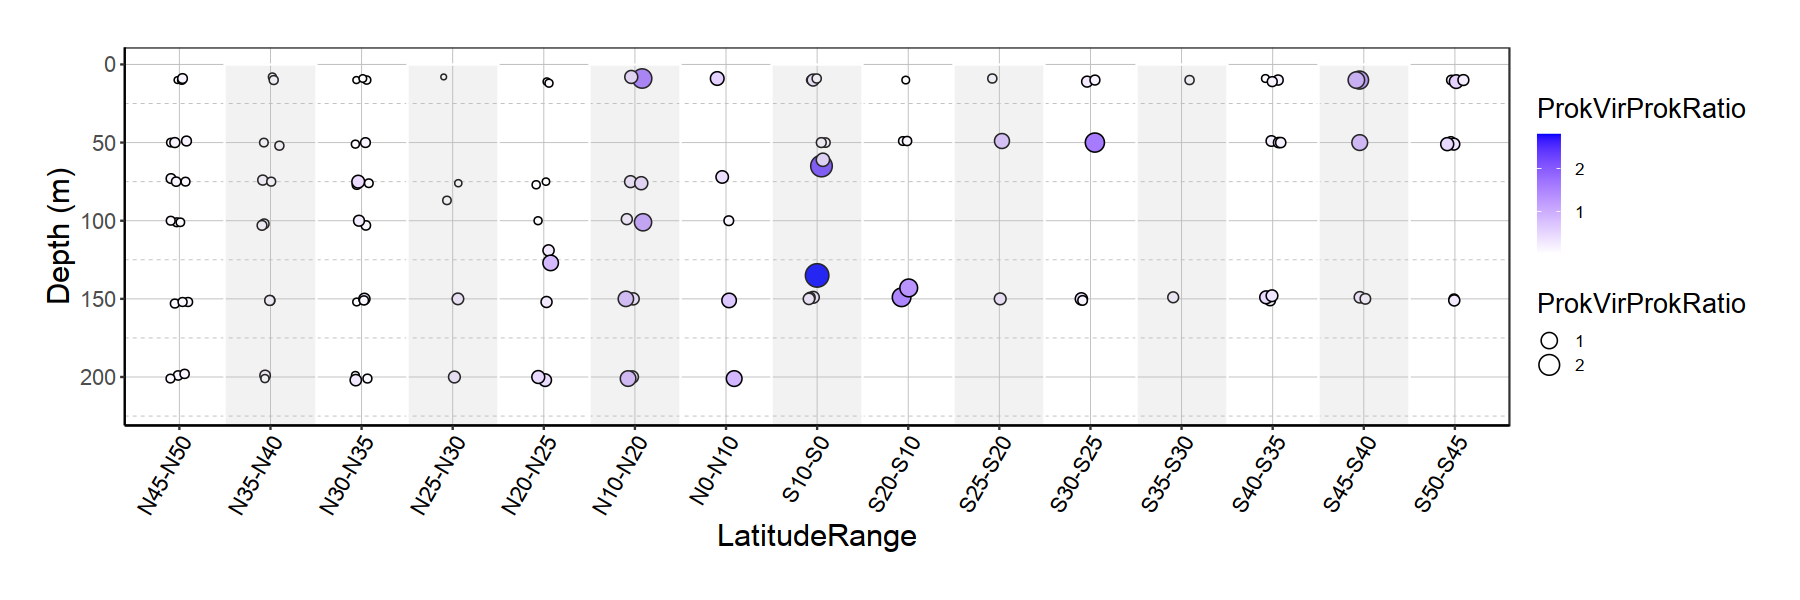

In [349]:
options(repr.plot.width=15, repr.plot.height=5)

ggplot(data=GA02_pct_meta_df3, mapping=aes(x=LatitudeRange, y=Depth, fill=ProkVirProkRatio)) + 
  geom_point(aes(size=ProkVirProkRatio), color="black", pch = 21, position = position_jitterdodge(0.2)) + 
  scale_y_reverse(lim=c(220, 0)) + ylab("Depth (m)") +
  geom_rect(data=rects_7, mapping=aes(xmin=xmin, xmax=xmax, ymin = 0, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  scale_fill_gradient(low = 'white', high = 'blue') +
  #scale_color_gradient2(low = 'blue', mid = 'white', high = 'red') +
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1), legend.position = "right") 

ggsave(filename="bioGEOTRACES_DEF_Class_Percentages_GA02_ProkVirProk_ratio_dotplot_v1.pdf", 
       plot = last_plot(), path="./", useDingbats=FALSE,
       scale = 1, width = 300, height = 100, units = "mm",
       dpi = 300, limitsize = FALSE)

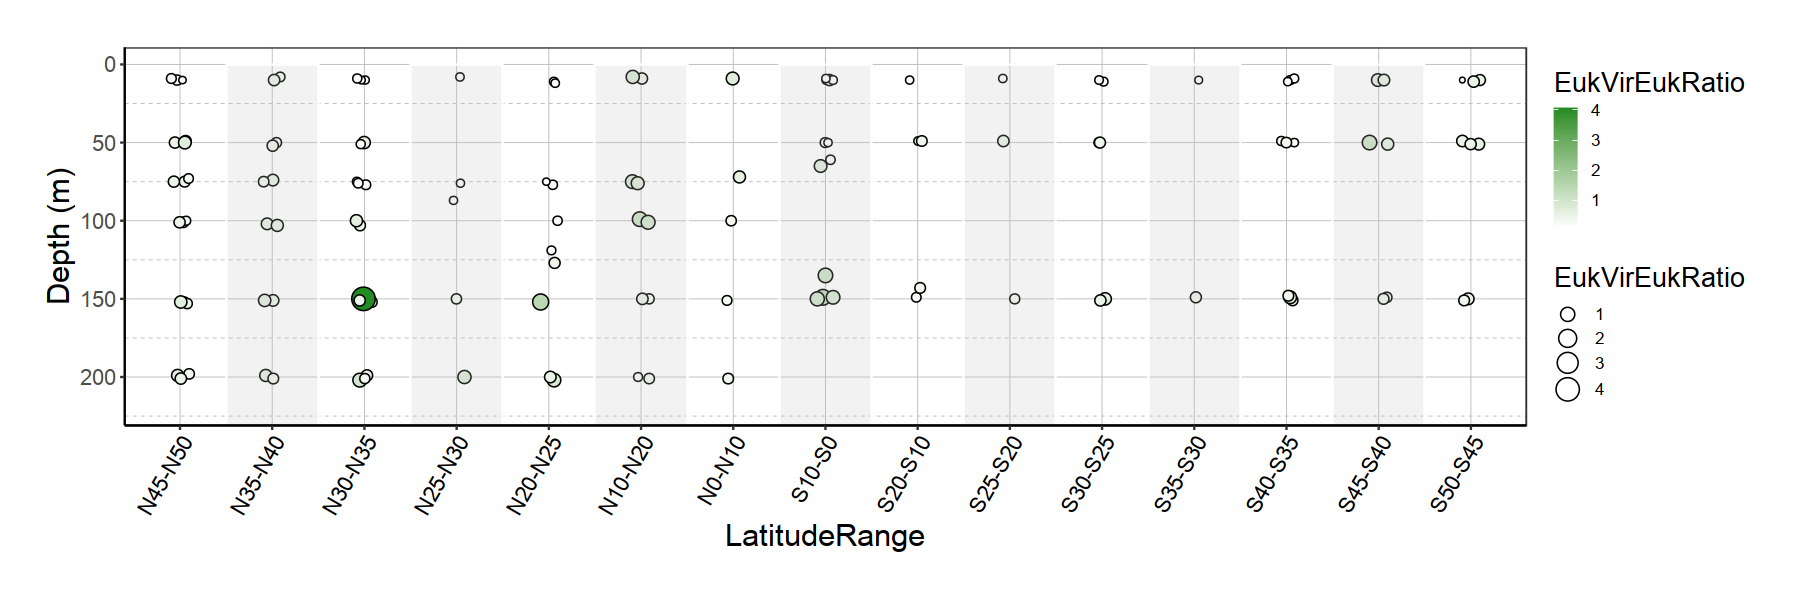

In [350]:
options(repr.plot.width=15, repr.plot.height=5)

ggplot(data=GA02_pct_meta_df3, mapping=aes(x=LatitudeRange, y=Depth, fill=EukVirEukRatio)) + 
  geom_point(aes(size=EukVirEukRatio), color="black", pch = 21, position = position_jitterdodge(0.2)) + 
  scale_y_reverse(lim=c(220, 0)) + ylab("Depth (m)") +
  geom_rect(data=rects_7, mapping=aes(xmin=xmin, xmax=xmax, ymin = 0, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  scale_fill_gradient(low = 'white', high = 'forestgreen') +
  #scale_color_gradient2(low = 'blue', mid = 'white', high = 'red') +
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1), legend.position = "right") 

ggsave(filename="bioGEOTRACES_DEF_Class_Percentages_GA02_EukVirEuk_ratio_dotplot_v1.pdf", 
       plot = last_plot(), path="./", useDingbats=FALSE,
       scale = 1, width = 300, height = 100, units = "mm",
       dpi = 300, limitsize = FALSE)

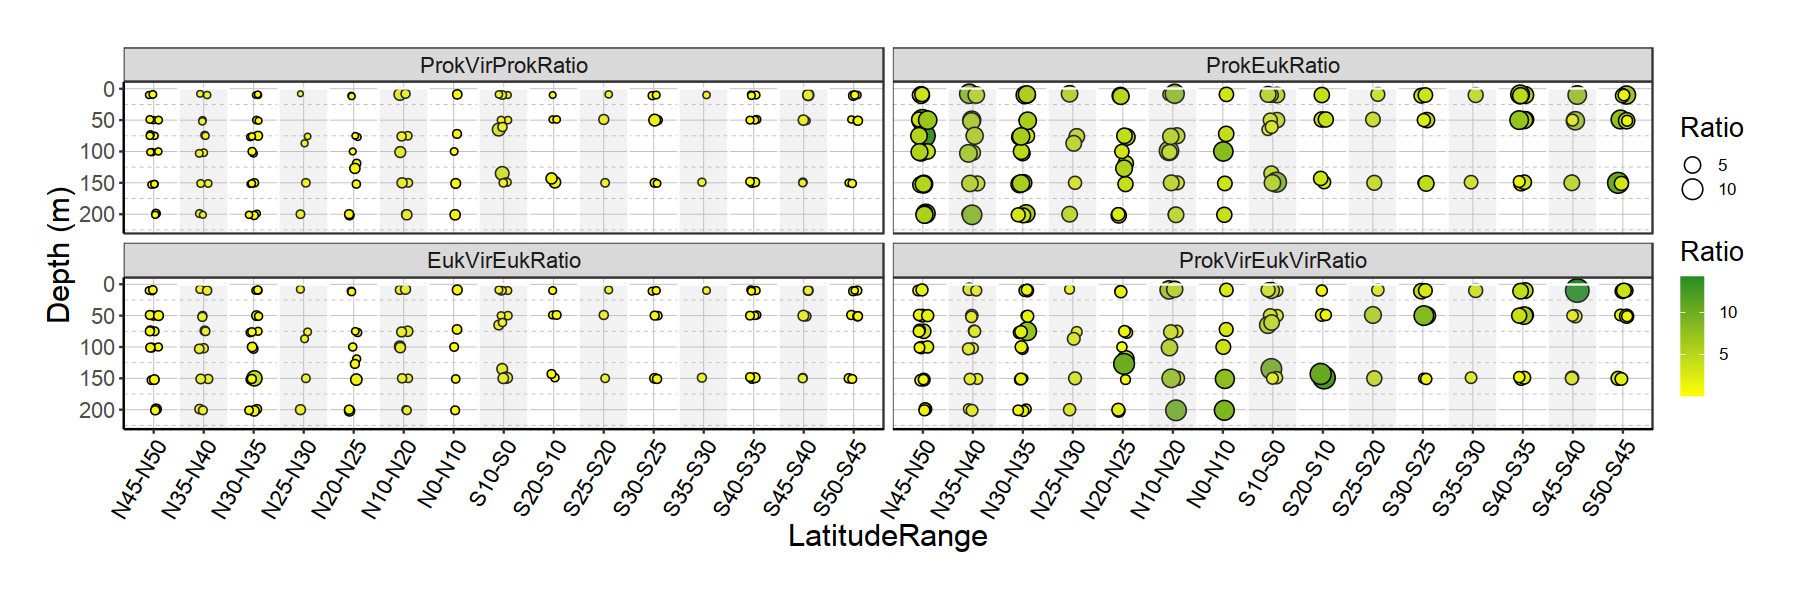

In [324]:
ggplot(data=GA02_pct_meta_df3.long, mapping=aes(x=LatitudeRange, y=Depth, fill=Ratio)) + 
  geom_point(aes(size=Ratio), color="black", pch = 21, position = position_jitterdodge(0.2)) + 
  scale_y_reverse(lim=c(220, 0)) + ylab("Depth (m)") +
  geom_rect(data=rects_7, mapping=aes(xmin=xmin, xmax=xmax, ymin = 0, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  scale_fill_gradient(low = 'yellow', high = 'forestgreen') +
  #scale_color_gradient2(low = 'blue', mid = 'white', high = 'red') +
  facet_wrap(~Comparison, nrow = 2) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1), legend.position = "right") 

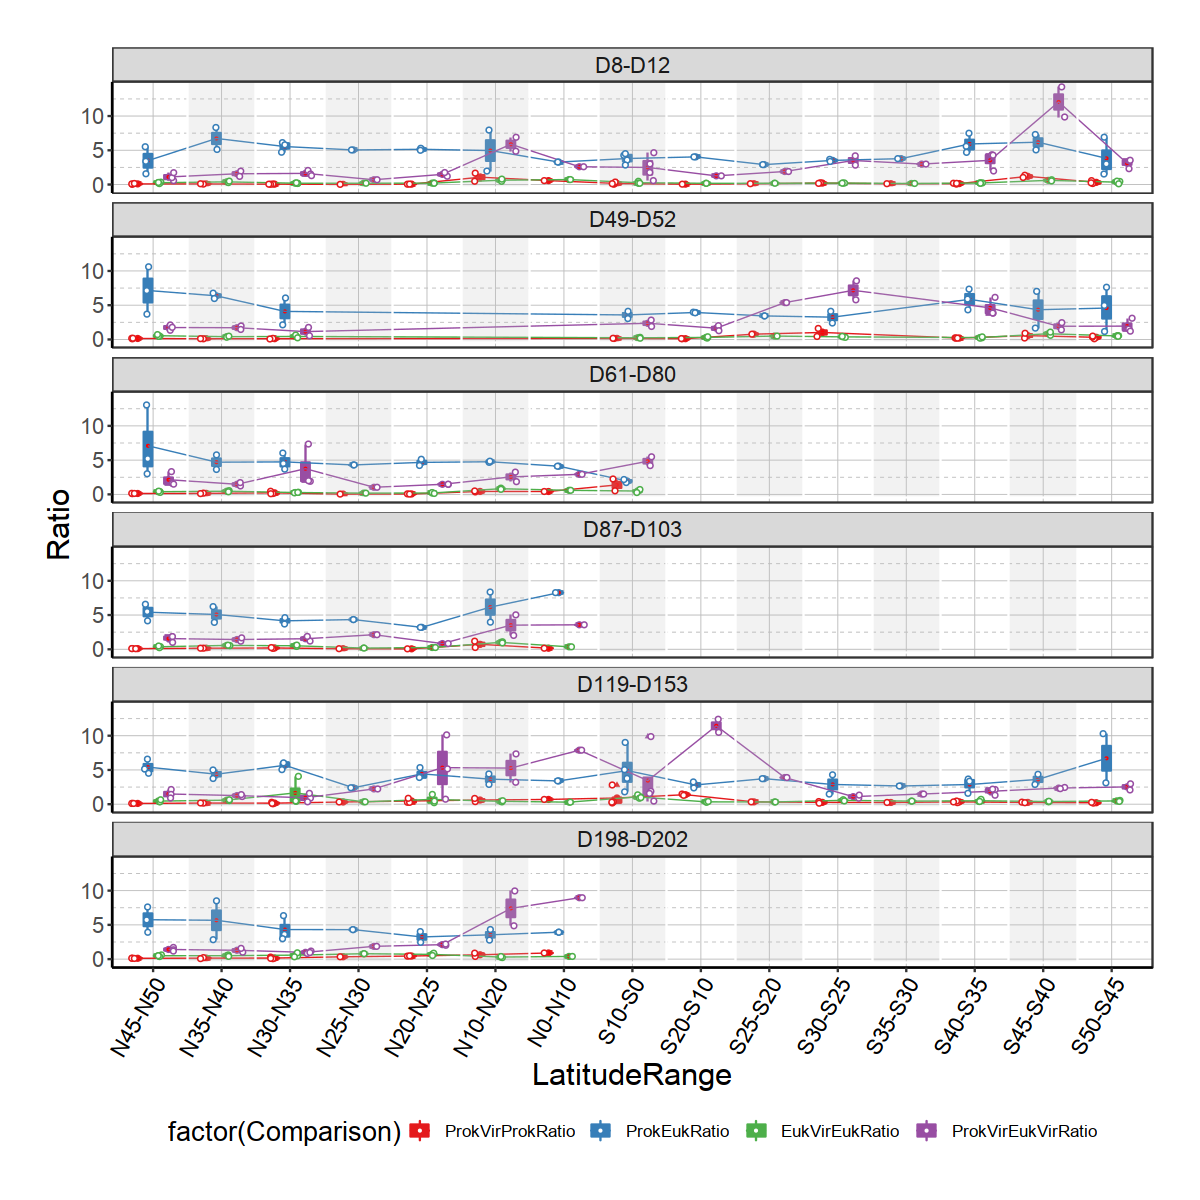

In [316]:
options(repr.plot.width=10, repr.plot.height=10)

pp <- ggplot(data=GA02_pct_meta_df3.long, mapping=aes(x=LatitudeRange, y=Ratio, fill=factor(Comparison), color=factor(Comparison))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Comparison)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Comparison, group=Comparison), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_7, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Comparison)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  #geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  facet_wrap(~DepthRange, nrow = 6) + 
  scale_fill_brewer(palette="Set1") + scale_color_brewer(palette="Set1") + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) 
pp

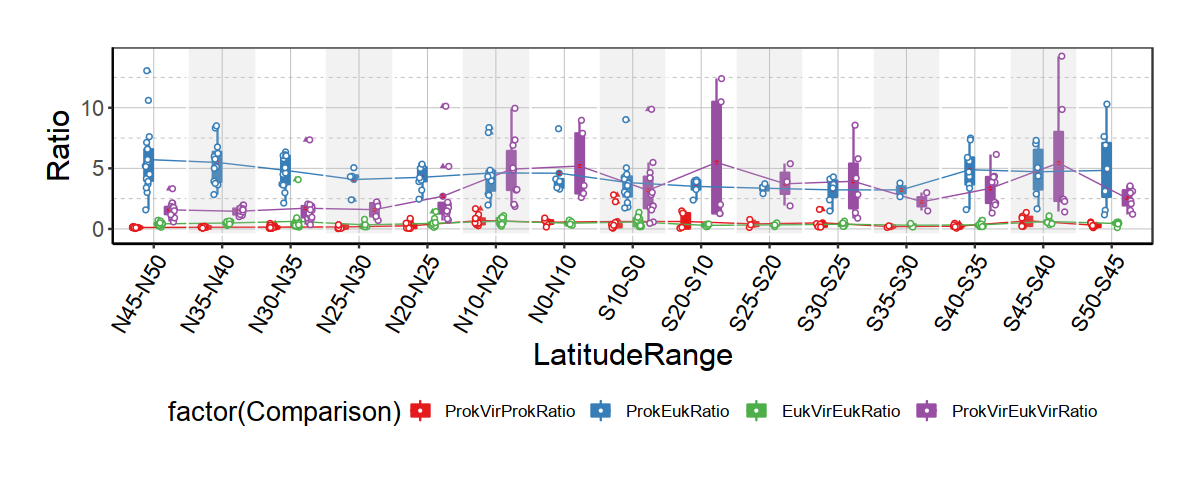

In [317]:
options(repr.plot.width=10, repr.plot.height=4)

pp_2 <- ggplot(data=GA02_pct_meta_df3.long, mapping=aes(x=LatitudeRange, y=Ratio, fill=factor(Comparison),colour=factor(Comparison))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Comparison)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Comparison, group=Comparison), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_7, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  #geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  geom_point(aes(color=factor(Comparison)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  scale_fill_brewer(palette="Set1") + scale_color_brewer(palette="Set1") + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))
pp_2

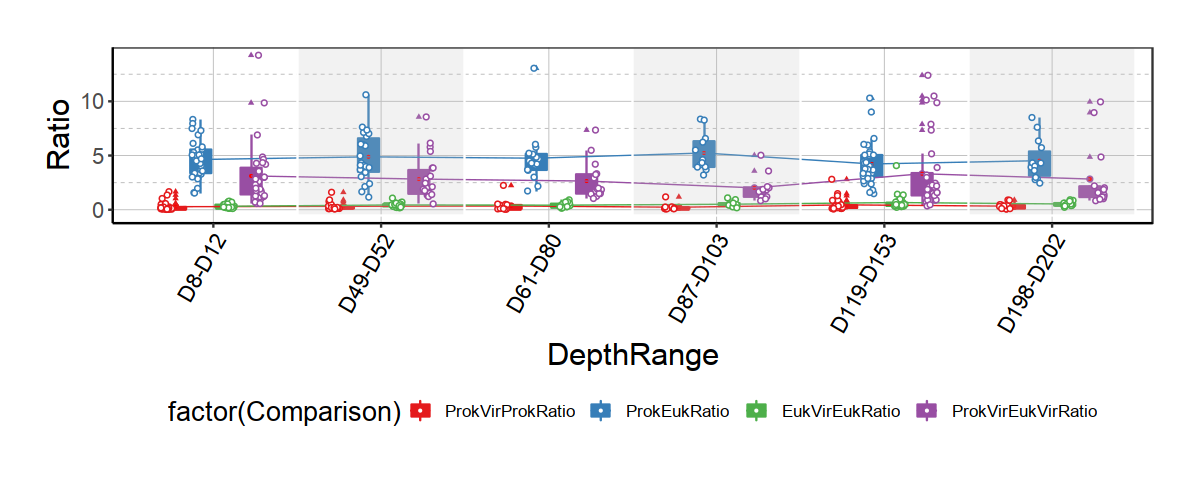

In [313]:
options(repr.plot.width=10, repr.plot.height=4)

pp_3 <- ggplot(data=GA02_pct_meta_df3.long, mapping=aes(x=DepthRange, y=Ratio, fill=factor(Comparison),colour=factor(Comparison))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Comparison)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Comparison, group=Comparison), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Comparison)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  #geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  scale_fill_brewer(palette="Set1") + scale_color_brewer(palette="Set1") + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))
pp_3

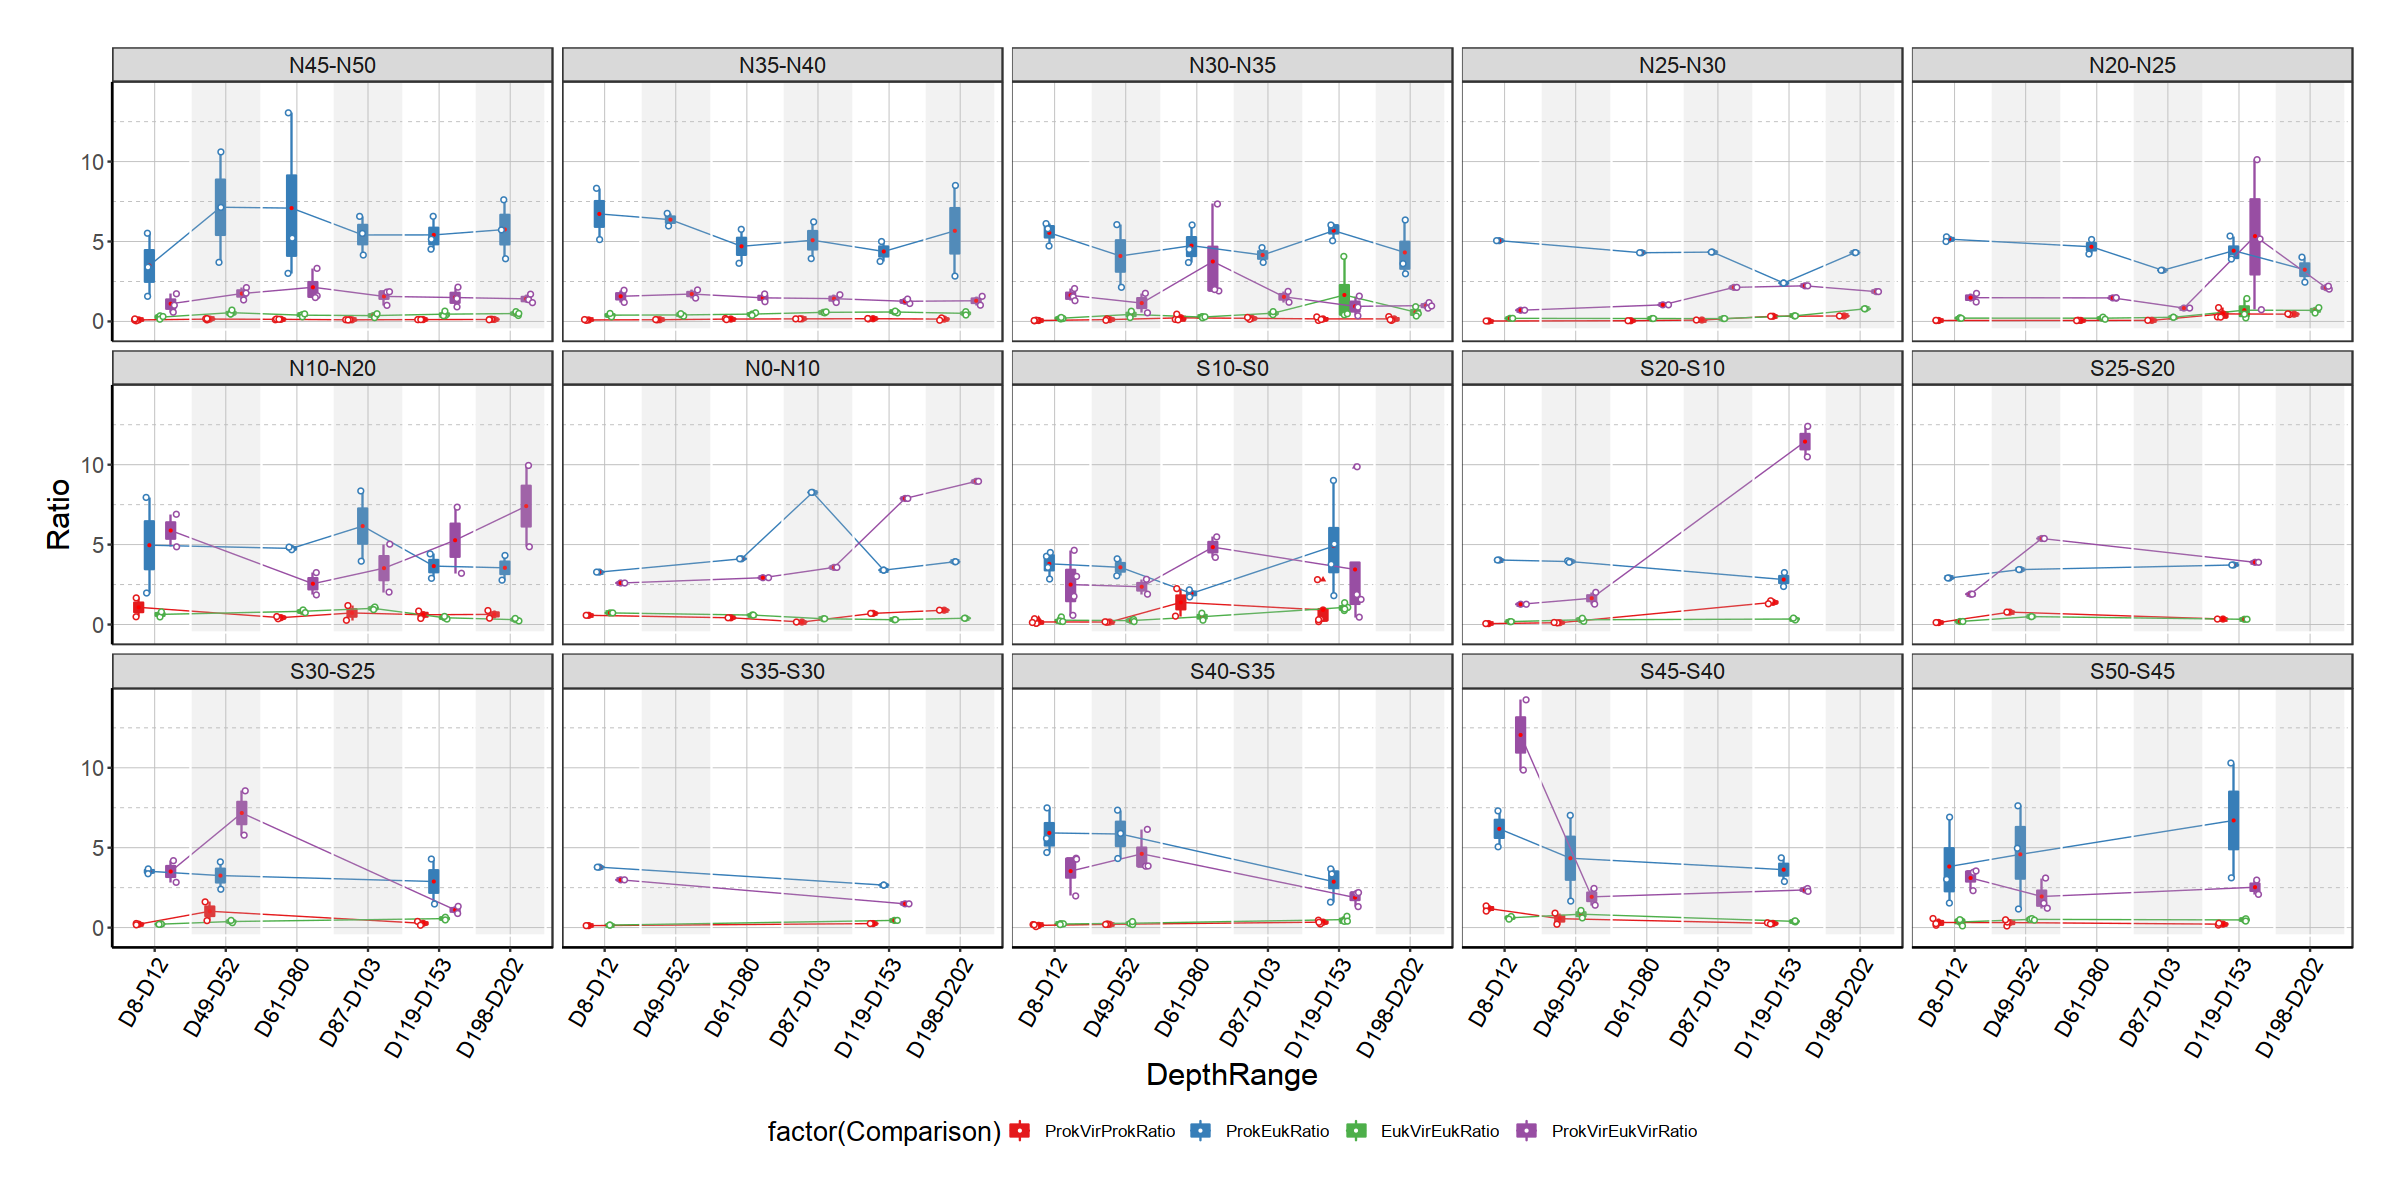

In [314]:
options(repr.plot.width=20, repr.plot.height=10)

pp_4 <- ggplot(data=GA02_pct_meta_df3.long, mapping=aes(x=DepthRange, y=Ratio, fill=factor(Comparison), colour=factor(Comparison))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=Comparison, group=Comparison), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  stat_summary(aes(color=factor(Comparison)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Comparison)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  #geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  scale_fill_brewer(palette="Set1") + scale_color_brewer(palette="Set1") + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) + 
  facet_wrap(~LatitudeRange, nrow = 3)
pp_4

## MetaPhlAn3 

In [171]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(SPRING)
library(phyloseq)

In [172]:
# modified from https://www.biostars.org/p/455240/
metaphlanToPhyloseq <- function(
    tax,
    metadat=NULL,
    simplenames=TRUE,
    roundtointeger=FALSE,
    split="|"){
    ## tax is a matrix or data.frame with the table of taxonomic abundances, rows are taxa, columns are samples
    ## metadat is an optional data.frame of specimen metadata, rows are samples, columns are variables
    ## if simplenames=TRUE, use only the most detailed level of taxa names in the final object
    ## if roundtointeger=TRUE, values will be rounded to the nearest integer
    xnames = rownames(tax)
    shortnames = gsub(paste0(".+\\", split), "", xnames)
    if(simplenames){
        rownames(tax) = shortnames
    }
    if(roundtointeger){
        tax = round(tax * 1e4)
    }
    x2 = strsplit(xnames, split=split, fixed=TRUE)
    taxmat = matrix(NA, ncol=max(sapply(x2, length)), nrow=length(x2))
    colnames(taxmat) = c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species", "Strain")[1:ncol(taxmat)]
    rownames(taxmat) = rownames(tax)
    for (i in 1:nrow(taxmat)){
        taxmat[i, 1:length(x2[[i]])] <- x2[[i]]
    }
    taxmat = gsub("[a-z]__", "", taxmat)
    taxmat = phyloseq::tax_table(taxmat)
    otutab = phyloseq::otu_table(tax, taxa_are_rows=TRUE)
    if(is.null(metadat)){
        res = phyloseq::phyloseq(taxmat, otutab)
    }else{
        res = phyloseq::phyloseq(taxmat, otutab, phyloseq::sample_data(metadat))
    }
    return(res)
}

In [210]:
merged_metaphlan_tbl <- "/home/shengwei/VirEncAct/@@DEF_Visualization/plot_bioGEOTRACES/merged_MetaPhlAn3_BioGEOTRACES_abundance_table.tab"
merged_metaphlan_df <- read.table(merged_metaphlan_tbl, header = T, row.names=1, sep = "\t", as.is = T, strip.white=T, stringsAsFactors = F)
merged_metaphlan_df <- merged_metaphlan_df[, -which(colnames(merged_metaphlan_df) == "NCBI_tax_id")] # remove NCBI_tax_id column
head(merged_metaphlan_df, 4)
#colnames(merged_metaphlan_df)

,SRR6507280,SRR6507279,SRR6507278,SRR6507277,SRR5788468,SRR5788467,SRR5788466,SRR5788465,SRR5788464,SRR5788463,⋯,SRR5720228,SRR5720227,SRR5720226,SRR5720225,SRR5720224,SRR5720223,SRR5720222,SRR5720221,SRR5720220,SRR5720219
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UNKNOWN,99.64535000,98.25117,99.06114000,97.96894,99.31169,99.1026600,97.47057,96.9029,99.262120000,98.07246,⋯,98.984000000,97.21526,99.5716100,99.4492300,99.4537100,99.632770000,96.44646,99.83633000,99.789290000,97.4411
k__Archaea,0.03269634,0.00000,0.01835311,0.00000,0.00000,0.6815456,0.00000,0.0000,0.004923887,0.00000,⋯,0.002295249,0.00000,0.0892929,0.0933124,0.3900638,0.002219108,0.00000,0.06005659,0.004678169,0.0000
k__Archaea|p__Candidatus_Heimdallarchaeota,0.00000000,0.00000,0.00000000,0.00000,0.00000,0.0000000,0.00000,0.0000,0.000000000,0.00000,⋯,0.000000000,0.00000,0.0000000,0.0000000,0.0000000,0.000000000,0.00000,0.00000000,0.000000000,0.0000
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified,0.00000000,0.00000,0.00000000,0.00000,0.00000,0.0000000,0.00000,0.0000,0.000000000,0.00000,⋯,0.000000000,0.00000,0.0000000,0.0000000,0.0000000,0.000000000,0.00000,0.00000000,0.000000000,0.0000


In [211]:
metadata_file <- "/home/shengwei/VirEncAct/@@DEF_Visualization/plot_bioGEOTRACES/biogeotraces_metadata_v2.tsv"
metadata_df <- read.table(metadata_file, header = T, sep = "\t", as.is = T, stringsAsFactors = F)
rownames(metadata_df) <- metadata_df$NCBI_SRA_Acc
head(metadata_df, 2)
unique(metadata_df$Cruise_Series)

,Sample_Name,Sample_ID,Cruise_Series,GEOTRACES_Section,Cruise_ID,Cruise_Station,Collection_Date,Collection_Year,Collection_Month,Collection_Time,⋯,Longitude,Bottle_ID,NCBI_BioPrj,NCBI_SRA_Study,NCBI_BioSample,NCBI_SRA_Acc,Total_Read_Pairs,Total_Bases,NCBI_SRA_Accession_Contigs,Assembly_Method
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
SRR5788236,SRZ187206,S0001,GEOTRACES,GA02,PE319,10,5/10/2010,2010,5,12:13:00,⋯,-42.4467,631397,PRJNA385854,SRP110813,SAMN07136483,SRR5788236,20058749,6017624700,SRZ187206,metaSPAdes v3.9.0
SRR5788235,SRZ187207,S0002,GEOTRACES,GA02,PE319,10,5/10/2010,2010,5,12:13:00,⋯,-42.4467,631391,PRJNA385854,SRP110813,SAMN07136484,SRR5788235,29418997,8825699100,SRZ187207,metaSPAdes v3.9.0


[1] "GEOTRACES" "HOT"       "BATS"

In [212]:
ps <- metaphlanToPhyloseq(merged_metaphlan_df, metadat=metadata_df)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 479 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 479 taxa by 7 taxonomic ranks ]

In [213]:
ps.GA02 <- subset_samples(ps, GEOTRACES_Section == "GA02")
ps.GA02

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 479 taxa and 127 samples ]
sample_data() Sample Data:       [ 127 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 479 taxa by 7 taxonomic ranks ]

In [220]:
ps_rownames <- rownames(sample_data(ps.GA02))
head(ps_rownames)

[1] "SRR5788468" "SRR5788467" "SRR5788447" "SRR5788436" "SRR5788435"
[6] "SRR5788434"

In [223]:
rownames(GA02_pct_meta_df2) <- GA02_pct_meta_df2$NCBI_SRA_Acc
GA02_pct_meta_df2 <- GA02_pct_meta_df2[ps_rownames,]
sample_data(ps.GA02)$LatitudeRange <- GA02_pct_meta_df2$LatitudeRange
sample_data(ps.GA02)$DepthRange <- GA02_pct_meta_df2$DepthRange
head(sample_data(ps.GA02), 2)

,Sample_Name,Sample_ID,Cruise_Series,GEOTRACES_Section,Cruise_ID,Cruise_Station,Collection_Date,Collection_Year,Collection_Month,Collection_Time,⋯,NCBI_BioPrj,NCBI_SRA_Study,NCBI_BioSample,NCBI_SRA_Acc,Total_Read_Pairs,Total_Bases,NCBI_SRA_Accession_Contigs,Assembly_Method,LatitudeRange,DepthRange
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<fct>,<fct>
SRR5788468,SRZ187421,S0229,GEOTRACES,GA02,JC057,8,3/13/2011,2011,3,13:43:00,⋯,PRJNA385854,SRP110813,SAMN07136698,SRR5788468,23750415,7125124500,SRZ187421,metaSPAdes v3.9.0,S40-S35,D8-D12
SRR5788467,SRZ187420,S0228,GEOTRACES,GA02,JC057,7,3/12/2011,2011,3,1:56:00,⋯,PRJNA385854,SRP110813,SAMN07136697,SRR5788467,18234842,5470452600,SRZ187420,metaSPAdes v3.9.0,S40-S35,D119-D153


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 188 taxa and 127 samples ]
sample_data() Sample Data:       [ 127 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 188 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 41 taxa and 127 samples ]
sample_data() Sample Data:       [ 127 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 41 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”


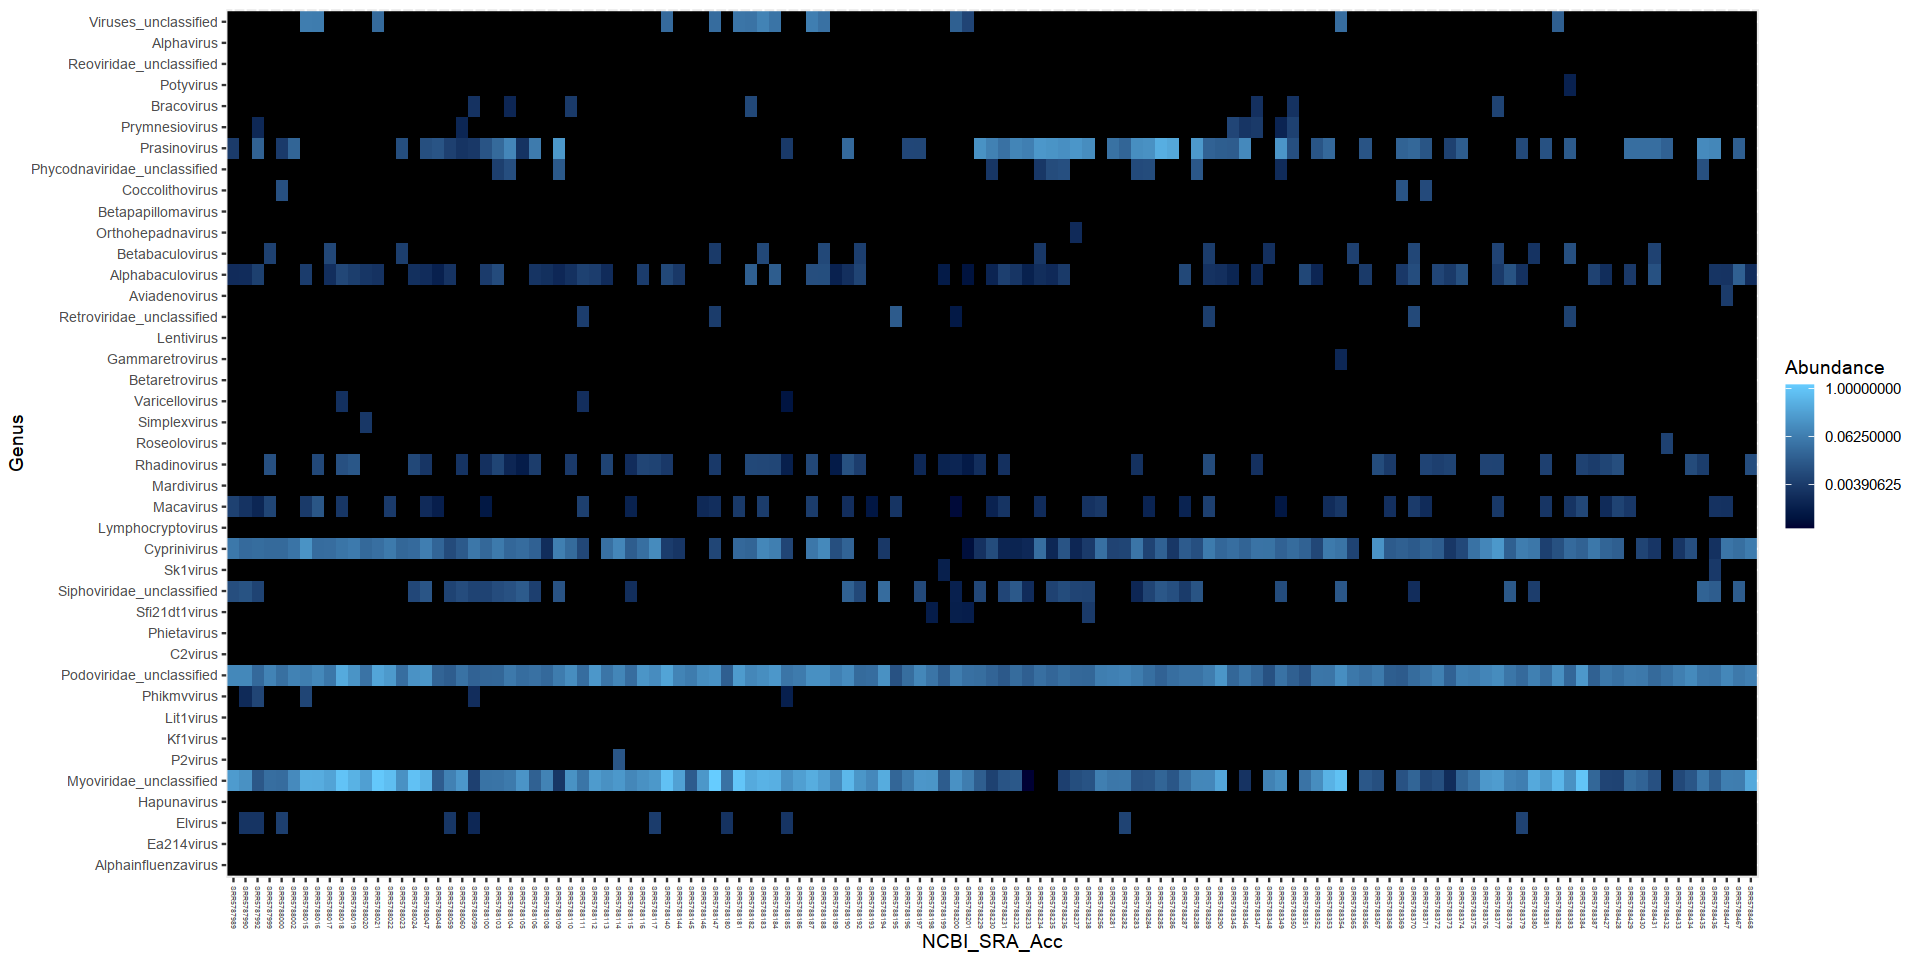

In [224]:
options(repr.plot.width=16, repr.plot.height=8)

# select all viruses
ps.vir <- subset_taxa(ps.GA02, Kingdom == "Viruses")
ps.vir

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.vir.genus <- subset_taxa(ps.vir, is.na(Species) & !is.na(Genus))
ps.vir.genus

plot_heatmap(ps.vir.genus,
             taxa.label="Genus", 
             taxa.order="Genus",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 188 taxa and 127 samples ]
sample_data() Sample Data:       [ 127 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 188 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 120 taxa and 127 samples ]
sample_data() Sample Data:       [ 127 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 120 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”


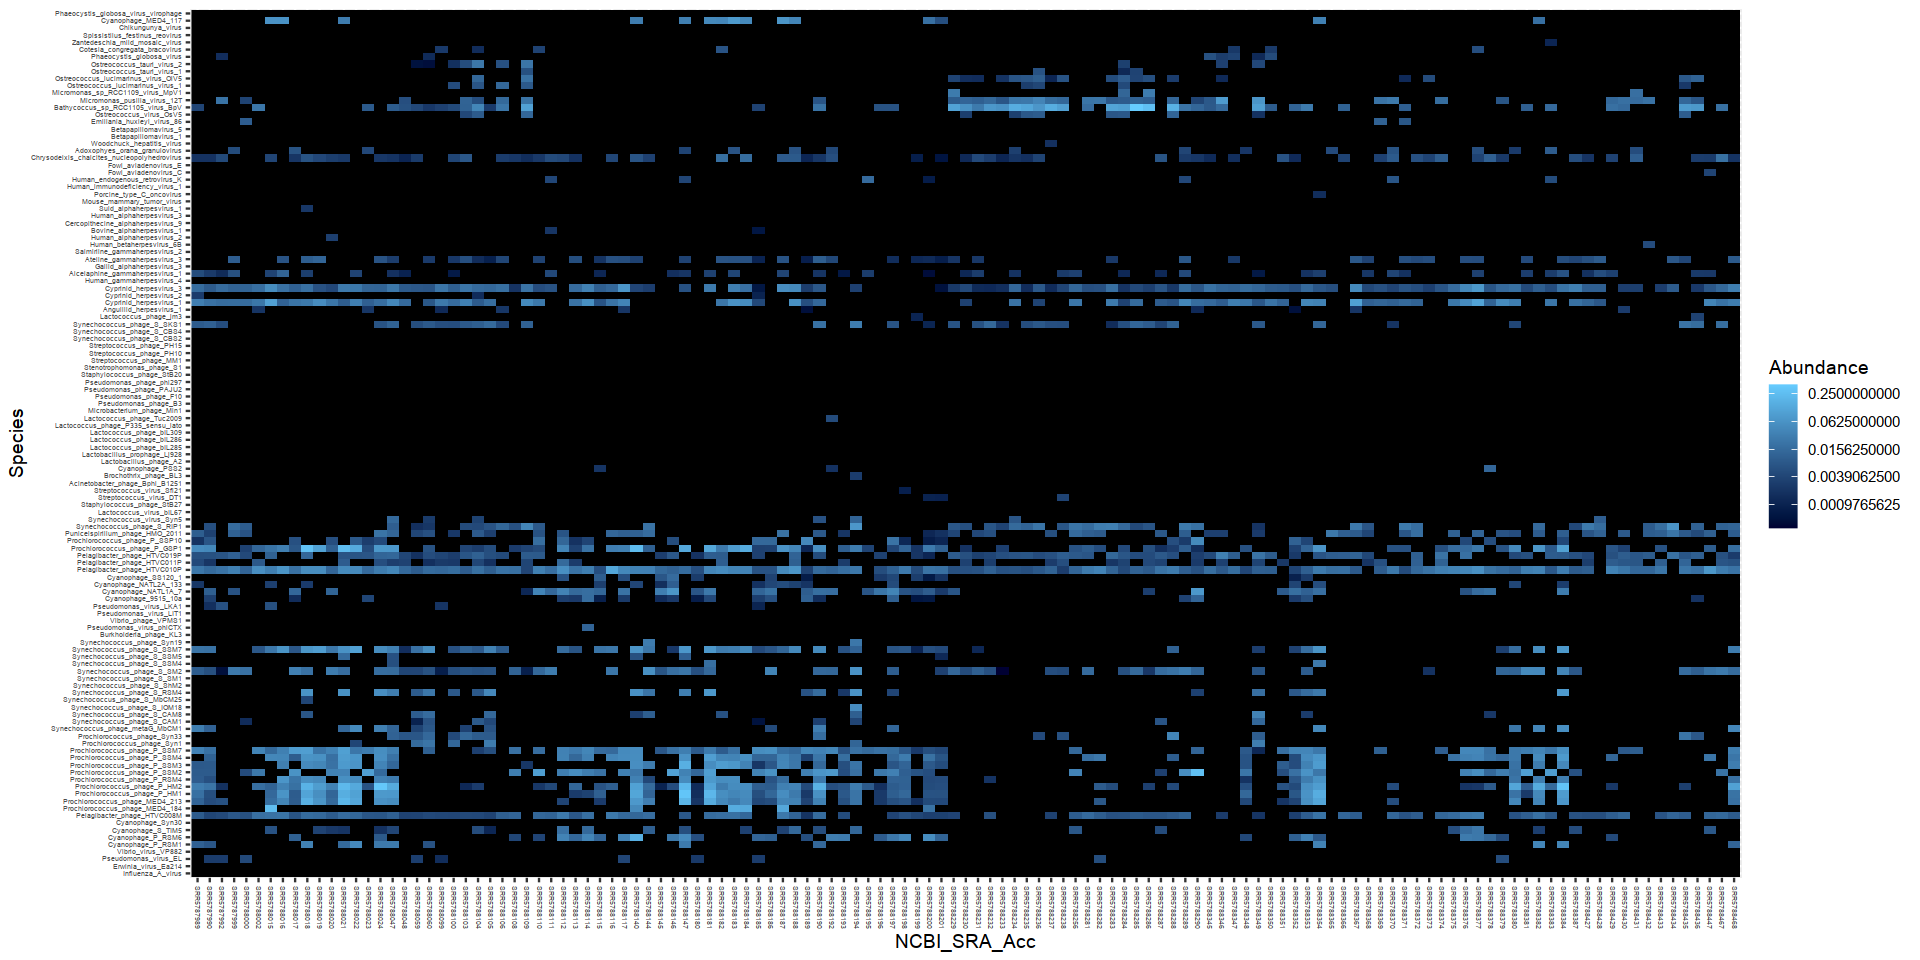

In [289]:
options(repr.plot.width=16, repr.plot.height=8)

# select all viruses
ps.vir <- subset_taxa(ps.GA02, Kingdom == "Viruses")
ps.vir

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.vir.species <- subset_taxa(ps.vir, !is.na(Species))
ps.vir.species

plot_heatmap(ps.vir.species,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

In [336]:
library(NetCoMi)

Loading required package: SpiecEasi





In [337]:
# keep only species with sum abundance >= 1e-1 across samples
ps.vir.species.fil <- prune_taxa(taxa_sums(ps.vir.species) >= 0.06, ps.vir.species)
# keep only samples with sum abundance >= 1e-1 across taxa
ps.vir.species.fil <- prune_samples(sample_sums(ps.vir.species.fil) >= 0.06, ps.vir.species.fil)

net_single_vir <- netConstruct(ps.vir.species.fil,
                           #filtTax = "highestFreq",
                           #filtTaxPar = list(highestFreq = 100),
                           #filtSamp = "totalReads",
                           #filtSampPar = list(totalReads = 0.01),
                           measure = "spring", # "pearson",
                           #measurePar = list(nlambda=10, 
                           #                  rep.num=10),
                           normMethod = "clr", 
                           zeroMethod = "multRepl",
                           sparsMethod = "threshold", 
                           thresh = 0.3,
                           dissFunc = "signed",
                           verbose = 3,
                           seed = 123456)

Infos about changed arguments:

Zero handling included in 'spring'.
Normalization ignored for measure 'spring'.
Sparsification included in 'spring'.


45 taxa and 121 samples remaining.


Calculate 'spring' associations ... 




The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann grap

Done.



In [338]:
props_single_vir <- netAnalyze(net_single_vir, 
                           centrLCC = TRUE,
                           avDissIgnoreInf = TRUE,
                           sPathNorm = FALSE,
                           clustMethod = "cluster_fast_greedy",
                           hubPar = "eigenvector", # hubPar = c("degree", "between", "closeness"),
                           hubQuant = 0.9,
                           lnormFit = TRUE,
                           weightDeg = FALSE, 
                           normBetw = FALSE,
                           normClose = FALSE,
                           normEigen = FALSE,
                           normDeg = FALSE)

#?summary.microNetProps
#summary(props_single_vir, numbNodes = 5L)

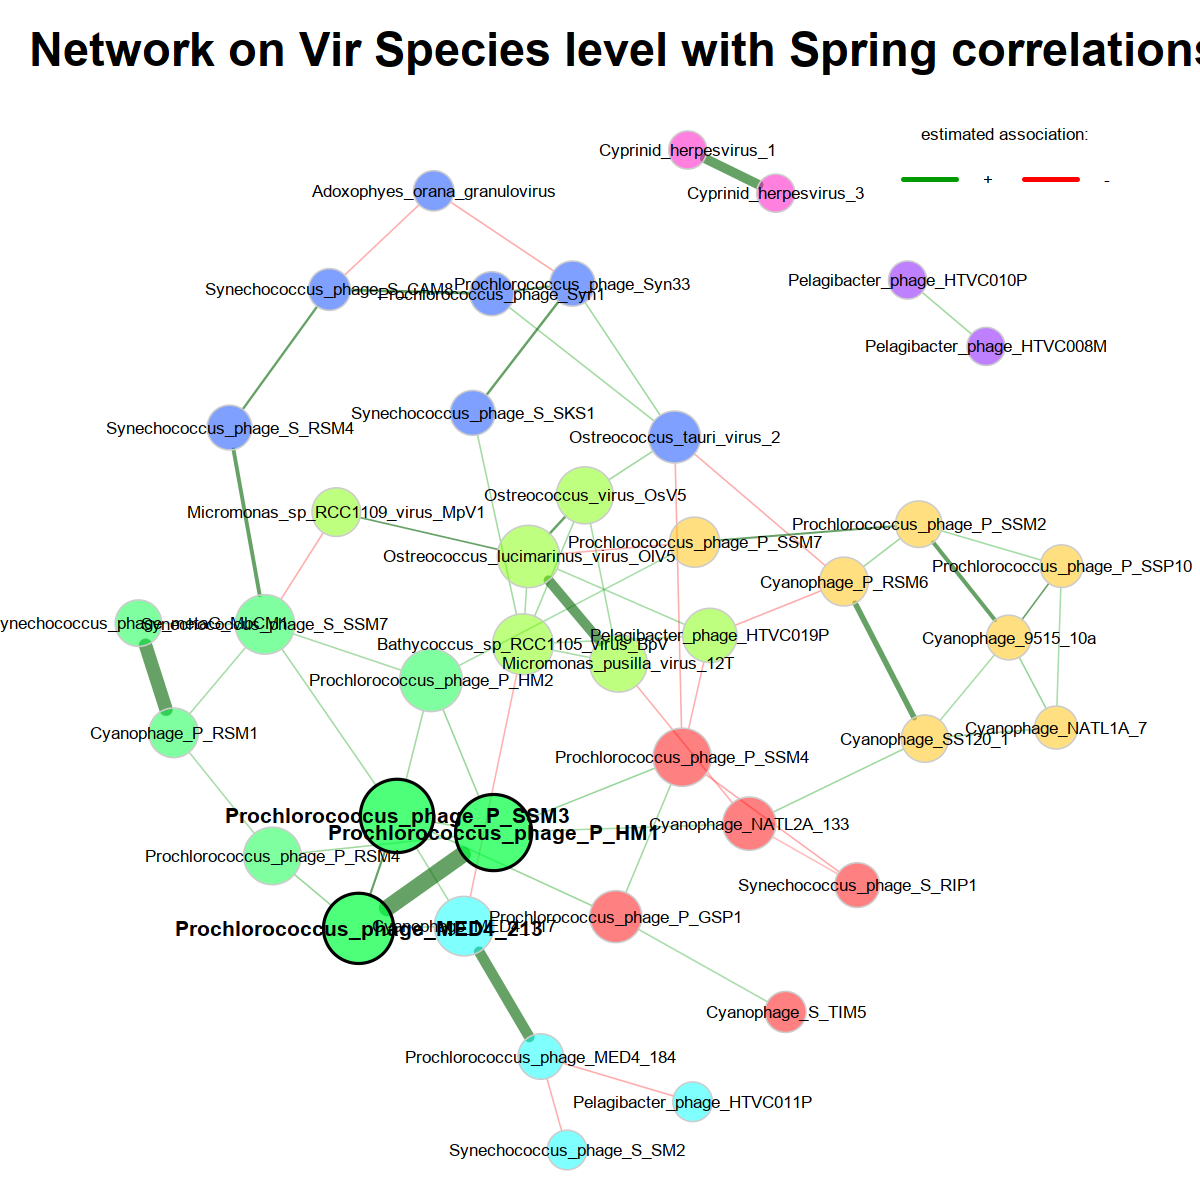

In [339]:
options(repr.plot.width=10, repr.plot.height=10)

p_vir <- plot(props_single_vir,
          layout = "layout_with_fr",
          labelScale = FALSE,
          rmSingles = TRUE,
          shortenLabels = "simple",
          labelLength = 50,
          charToRm = "s__",
          nodeColor = "cluster", 
          nodeSize = "eigenvector", # clr
          nodeSizeSpread = 3,
          hubBorderCol = "black",
          repulsion = 0.8,
          cexNodes = 3,
          cexLabels = 0.8,
          cexHubLabels = 1,
          title1 = "Network on Vir Species level with Spring correlations", 
          showTitle = TRUE,
          cexTitle = 2.3, 
          edgeTranspLow = 60, 
          edgeTranspHigh = 40,
          nodeTransp = 50, 
          hubTransp = 30
         )


legend(0.6, 1.1, cex = 0.8, title = "estimated association:",
       legend = c("+","-"), lty = 1, lwd = 3, col = c("#009900","red"), 
       bty = "n", horiz = TRUE)

In [256]:
options(repr.plot.width=16, repr.plot.height=8)

# select all prokaryotes
ps.prok <- subset_taxa(ps.GA02, Kingdom %in% c("Bacteria", "Archaea"))
ps.prok

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.prok.species <- subset_taxa(ps.prok, !is.na(Species))
ps.prok.species

# get HOT Prokaryotes abundance table
prok_species_abund <- t(otu_table(ps.prok.species))
ncol(prok_species_abund)
# colnames(HOT_pro_species_abund)

# select columns with colum sum >= 1e-6
keep_cols <- colSums(prok_species_abund) >= 1e-1
prok_species_abund <- prok_species_abund[, keep_cols]
ncol(prok_species_abund)
head(prok_species_abund, 2)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 283 taxa and 127 samples ]
sample_data() Sample Data:       [ 127 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 283 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 111 taxa and 127 samples ]
sample_data() Sample Data:       [ 127 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 111 taxa by 7 taxonomic ranks ]

[1] 111

[1] 13

,s__Candidatus_Nitrosomarinus_catalina,s__Candidatus_Nitrosopelagicus_brevis,s__Crocosphaera_watsonii,s__Richelia_intracellularis,s__Prochlorococcus_marinus,s__Synechococcus_sp_BL107,s__Synechococcus_sp_CC9902,s__Synechococcus_sp_MED_G68,s__Synechococcus_sp_NAT40,s__Synechococcus_sp_WH_8109,s__Alphaproteobacteria_bacterium_MarineAlpha12_Bin1,s__Candidatus_Pelagibacter_ubique,s__Oceanobacter_sp
SRR5788468,0.00000000,0.0000000,0,0,0.1835387,0,0,0,0,0.001109562,0,0,0
SRR5788467,0.01059225,0.6709532,0,0,0.0000000,0,0,0,0,0.000000000,0,0,0


In [290]:
library("RColorBrewer")

# sort abundance table accroding to sample metadata
# the metadata has to be in data.frame, not phyloseq sample.data format
sample_metadata <- data.frame(sample_data(ps.GA02)[, c("DepthRange", "LatitudeRange")])
sample_metadata <- with(sample_metadata, sample_metadata[order(LatitudeRange, DepthRange),])

depth_levels <- levels(sample_metadata$DepthRange)
depth_colors <- setNames(brewer.pal(length(depth_levels), "BuPu"), depth_levels)
latitude_levels <- levels(sample_metadata$LatitudeRange)
latitude_colors <- setNames(colorRampPalette(brewer.pal(11, "RdYlGn"))(length(latitude_levels)), latitude_levels)

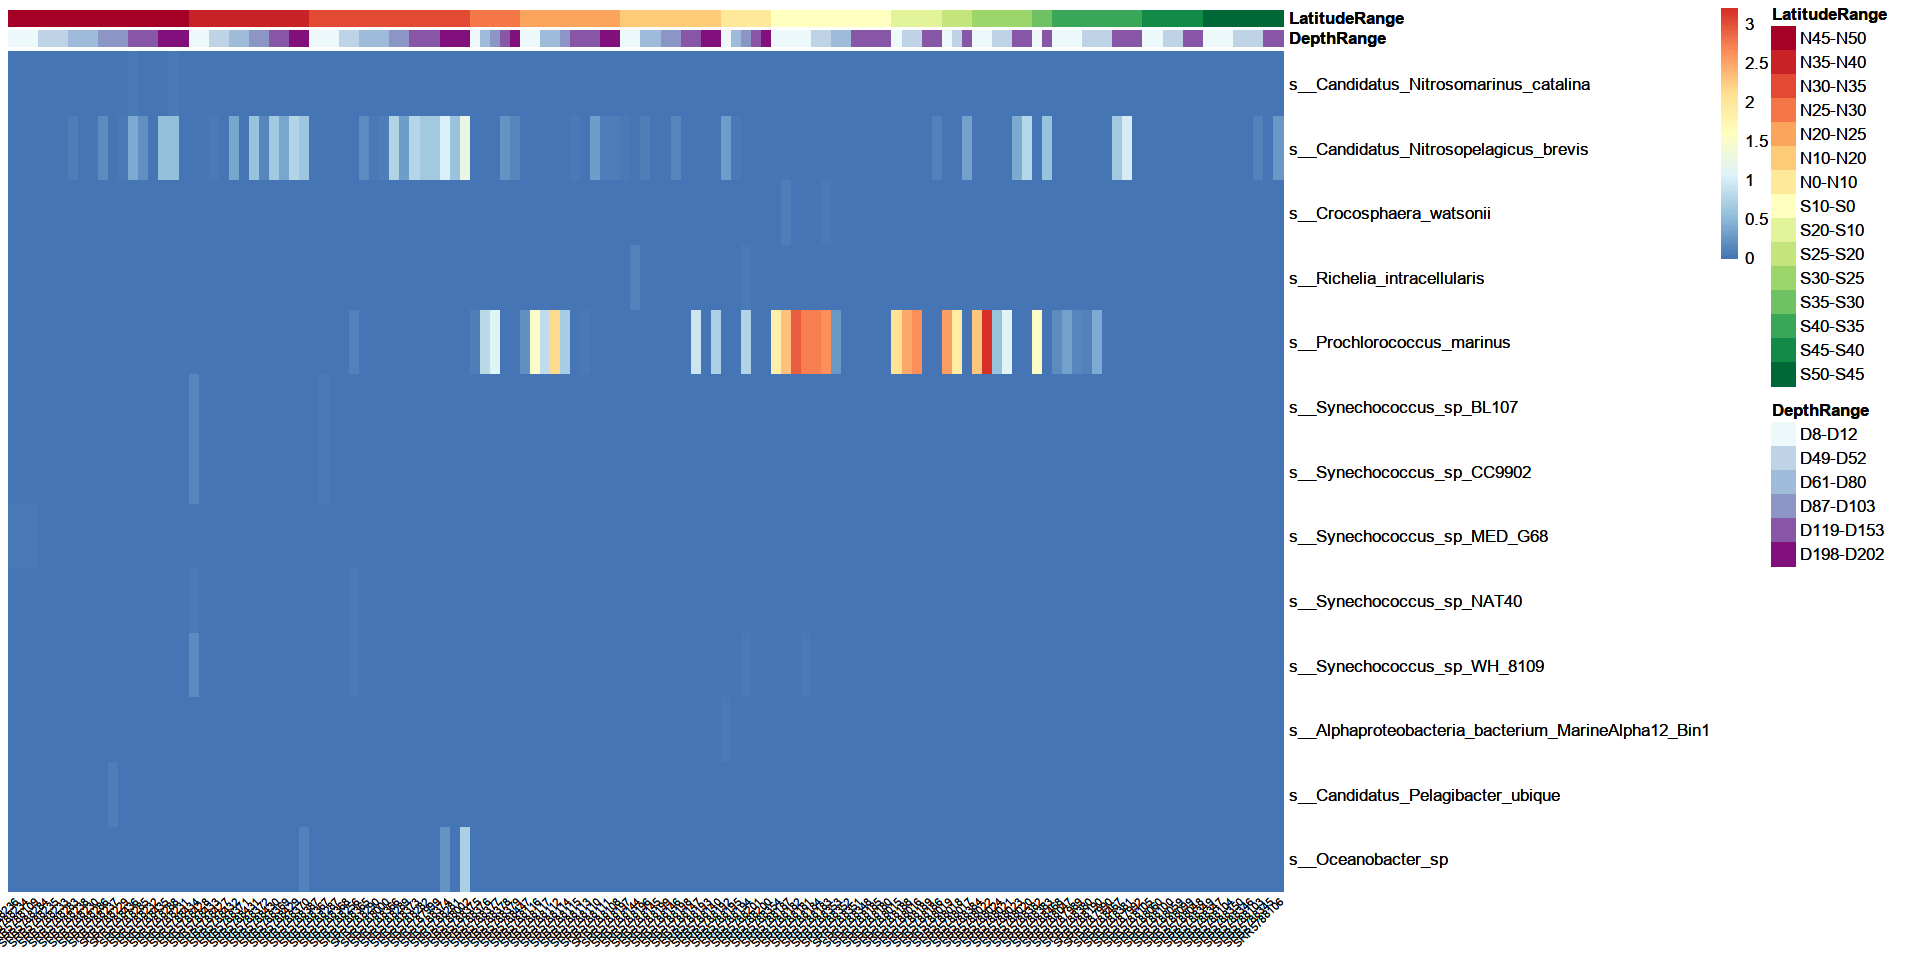

In [291]:
options(repr.plot.width=16, repr.plot.height=8)

library(pheatmap)
prok_species_abund.t <- t(prok_species_abund)
prok_species_abund.t <- prok_species_abund.t[, rownames(sample_metadata)]
pheat.prok <- pheatmap(prok_species_abund.t, 
         #legend_breaks = 0:3, legend_labels = paste('1e', 0:3, sep=''), 
         cluster_cols = F, 
         cluster_rows = F, 
         annotation_col = sample_metadata,     
         annotation_colors = list(
             DepthRange = depth_colors,
             LatitudeRange = latitude_colors),
         fontsize_col = 6, 
         fontsize_row = 10, 
         angle_col = 45,
         cutree_rows = 1,
         show_rownames = T)

print(pheat.prok)

In [287]:
# get HOT Prokaryotes abundance table
vir_species_abund <- t(otu_table(ps.vir.species))
ncol(vir_species_abund)

# select columns with colum sum >= 1e-6
keep_cols <- colSums(vir_species_abund) >= 1e-1
vir_species_abund <- vir_species_abund[, keep_cols]
ncol(vir_species_abund)
head(vir_species_abund, 2)

[1] 120

[1] 54

,s__Pseudomonas_virus_EL,s__Cyanophage_P_RSM1,s__Cyanophage_P_RSM6,s__Cyanophage_S_TIM5,s__Cyanophage_Syn30,s__Pelagibacter_phage_HTVC008M,s__Prochlorococcus_phage_MED4_184,s__Prochlorococcus_phage_MED4_213,s__Prochlorococcus_phage_P_HM1,s__Prochlorococcus_phage_P_HM2,⋯,s__Human_endogenous_retrovirus_K,s__Chrysodeixis_chalcites_nucleopolyhedrovirus,s__Adoxophyes_orana_granulovirus,s__Ostreococcus_virus_OsV5,s__Bathycoccus_sp_RCC1105_virus_BpV,s__Micromonas_pusilla_virus_12T,s__Micromonas_sp_RCC1109_virus_MpV1,s__Ostreococcus_lucimarinus_virus_OlV5,s__Ostreococcus_tauri_virus_2,s__Cyanophage_MED4_117
SRR6507280,0,0.005081844,0.05778194,0,0,0.00372178,0,0.001920383,0.005908225,0.00806158,⋯,0,0.001882612,0.001453232,0,0.004839863,0,0,0,0,0
SRR6507279,0,0.018783255,0.00000000,0,0,0.00000000,0,0.017673626,0.008942267,0.03256924,⋯,0,0.011484884,0.000000000,0,0.000000000,0,0,0,0,0


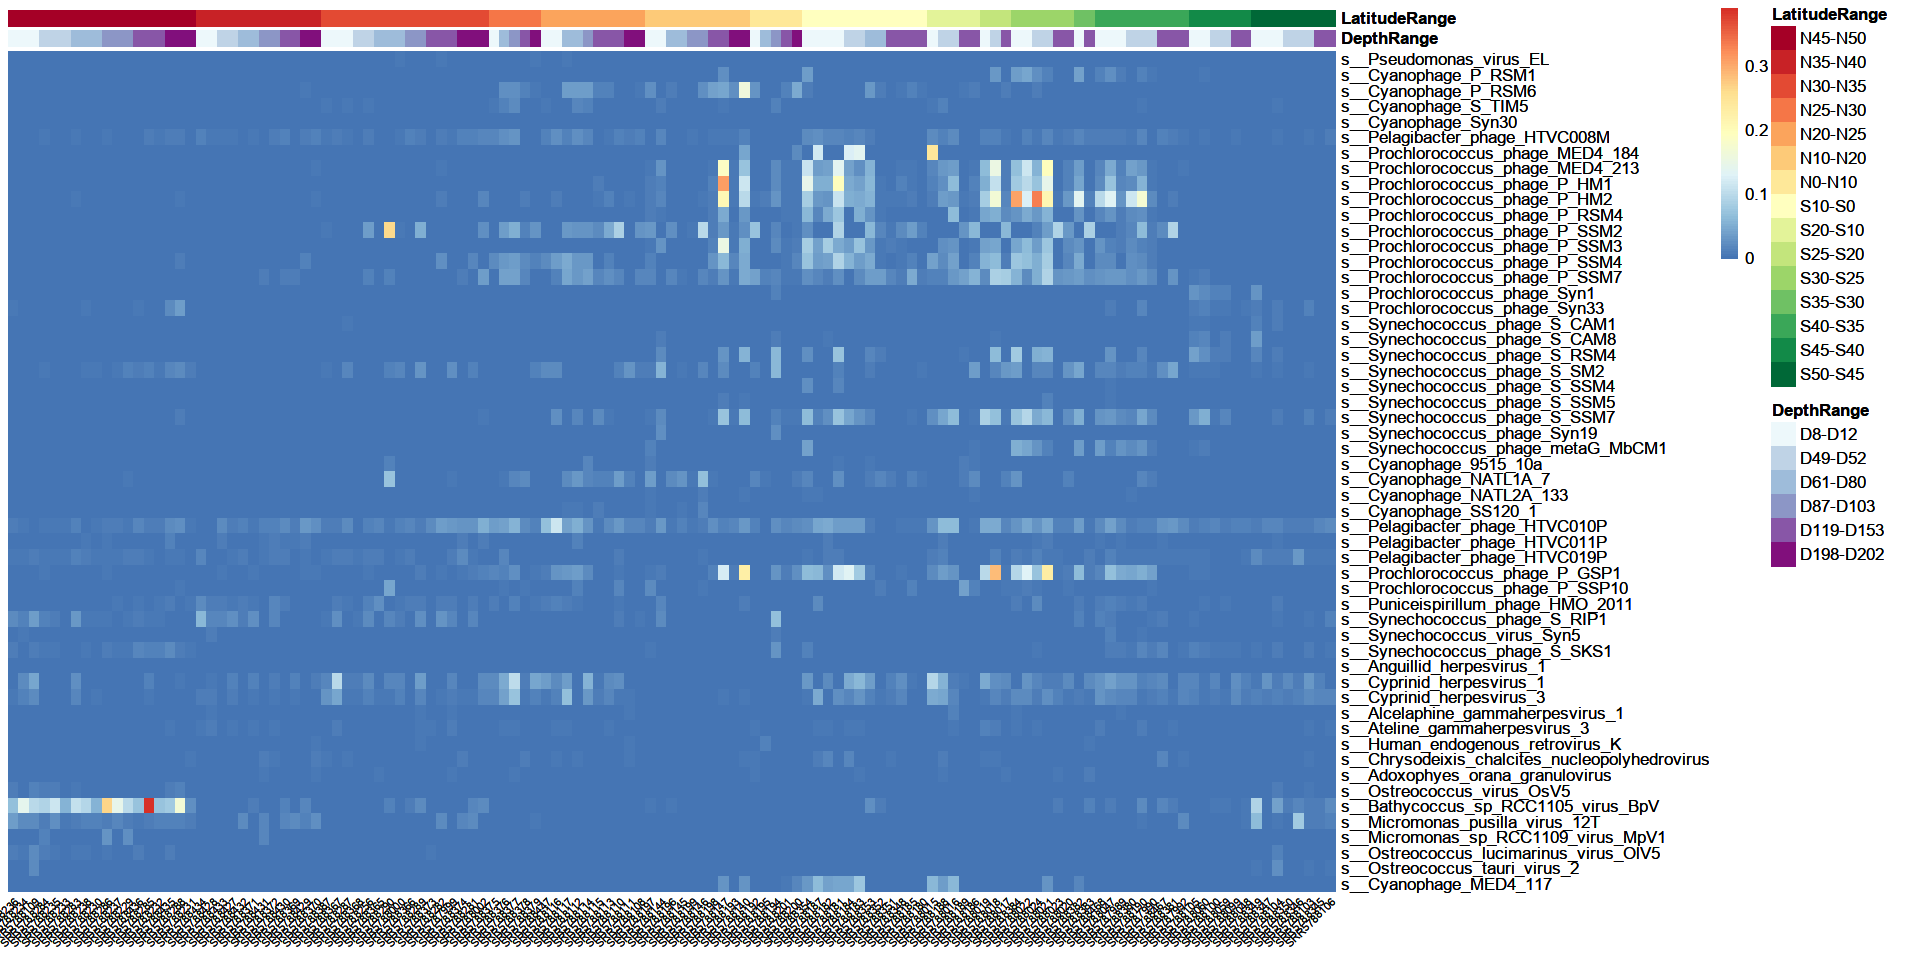

In [292]:
options(repr.plot.width=16, repr.plot.height=8)

library(pheatmap)
vir_species_abund.t <- t(vir_species_abund)
vir_species_abund.t <- vir_species_abund.t[, rownames(sample_metadata)]
pheat.vir <- pheatmap(vir_species_abund.t, 
         #legend_breaks = 0:3, legend_labels = paste('1e', 0:3, sep=''), 
         cluster_cols = F, 
         cluster_rows = F, 
         annotation_col = sample_metadata,     
         annotation_colors = list(
             DepthRange = depth_colors,
             LatitudeRange = latitude_colors),
         fontsize_col = 6, 
         fontsize_row = 10, 
         angle_col = 45,
         cutree_rows = 1,
         show_rownames = T)

print(pheat.vir)

### Calculate cyanophage/cyano ratios

In [391]:
ps.vir <- subset_taxa(ps, Kingdom=="Viruses")
cyanophage_rows <- grepl(pattern = "Prochlorococcus_phage|Synechococcus_phage|Cyanophage", rownames(otu_table(ps.vir)))
cyanophage_df <- otu_table(ps.vir)[cyanophage_rows]
head(cyanophage_df, 2)
dim(cyanophage_df)

,SRR6507280,SRR6507279,SRR6507278,SRR6507277,SRR5788468,SRR5788467,SRR5788466,SRR5788465,SRR5788464,SRR5788463,⋯,SRR5720228,SRR5720227,SRR5720226,SRR5720225,SRR5720224,SRR5720223,SRR5720222,SRR5720221,SRR5720220,SRR5720219
s__Cyanophage_P_RSM1,0.005081844,0.01878326,0.0000000,0.00000000,0.01216154,0,0.02742717,0.02473471,0.004162171,0.02037199,⋯,0.0000000,0.02594795,0.0000000,0.00000000,0.00000000,0.00000000,0,0,0.00000000,0
s__Cyanophage_P_RSM6,0.057781941,0.00000000,0.1818652,0.01664047,0.00000000,0,0.01427891,0.01623037,0.032868511,0.04522107,⋯,0.1487366,0.01229380,0.0183599,0.01200906,0.01787163,0.04214065,0,0,0.02600587,0


[1]  40 610

In [392]:
ps.synechococcales <- subset_taxa(ps, Order=="Synechococcales")
ps.synechococcales
synechococcales_df <- otu_table(ps.synechococcales)
head(synechococcales_df, 2)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 20 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 20 taxa by 7 taxonomic ranks ]

,SRR6507280,SRR6507279,SRR6507278,SRR6507277,SRR5788468,SRR5788467,SRR5788466,SRR5788465,SRR5788464,SRR5788463,⋯,SRR5720228,SRR5720227,SRR5720226,SRR5720225,SRR5720224,SRR5720223,SRR5720222,SRR5720221,SRR5720220,SRR5720219
o__Synechococcales,0.005118657,1.342975,0.1479083,1.058334,0.1853293,0.001305636,1.387562,1.666974,0.1075107,0.5104696,⋯,0.357406,2.011347,0.01770883,0.05439721,0,0.01351203,2.913534,0,0.003359523,2.049058
f__Prochloraceae,0.005118657,1.342975,0.1479083,1.058334,0.1835387,0.001305636,1.381370,1.660997,0.1075107,0.5082437,⋯,0.357406,2.011347,0.01770883,0.05439721,0,0.01351203,2.913534,0,0.003359523,2.049058


In [396]:
cyanophage_cyano_df <- data.frame(cyano=colSums(synechococcales_df), cyanophage=colSums(cyanophage_df))
cyanophage_cyano_df["ratio"] <- cyanophage_cyano_df$cyanophage / cyanophage_cyano_df$cyano
cyanophage_cyano_df[cyanophage_cyano_df == Inf] <- NA
head(cyanophage_cyano_df)

,cyano,cyanophage,ratio
,<dbl>,<dbl>,<dbl>
SRR6507280,0.020474629,0.24978412,12.19968925
SRR6507279,5.371899359,0.27929907,0.05199261
SRR6507278,0.591633252,0.65950582,1.11472068
SRR6507277,4.233337149,0.70718943,0.16705247
SRR5788468,0.741317161,0.36176061,0.48799708
SRR5788467,0.005222543,0.07428888,14.22465636


In [398]:
rownames(GA02_pct_meta_df2) <- GA02_pct_meta_df2$NCBI_SRA_Acc
cyanophage_cyano_meta_df <- merge(x = cyanophage_cyano_df, y = GA02_pct_meta_df2, by="row.names")
head(cyanophage_cyano_meta_df, 2)

,Row.names,cyano,cyanophage,ratio,NCBI_SRA_Acc,Collection_Year,Collection_Month,Collection_Date,Cruise_Station,Latitude,⋯,Total_Read_Pairs,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,TotalCnt,Prok_n_Plas,LatitudeRange,DepthRange
,<I<chr>>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>
1,SRR5787989,0.5454119,0.2516007,0.461304,SRR5787989,2011,3,3/12/2011,7,-37.8305,⋯,21223972,2.939610,0.6951479,8.511710,13.50894,1.377447,5737446,22.02065,S40-S35,D8-D12
2,SRR5787990,0.1236135,0.2095322,1.695060,SRR5787990,2011,3,3/12/2011,7,-37.8305,⋯,16772510,2.455864,0.9249480,6.529339,11.51743,3.567814,4192355,18.04677,S40-S35,D49-D52


Warning message:
“Removed 36 rows containing missing values (geom_point).”
Warning message:
“Removed 36 rows containing missing values (geom_point).”


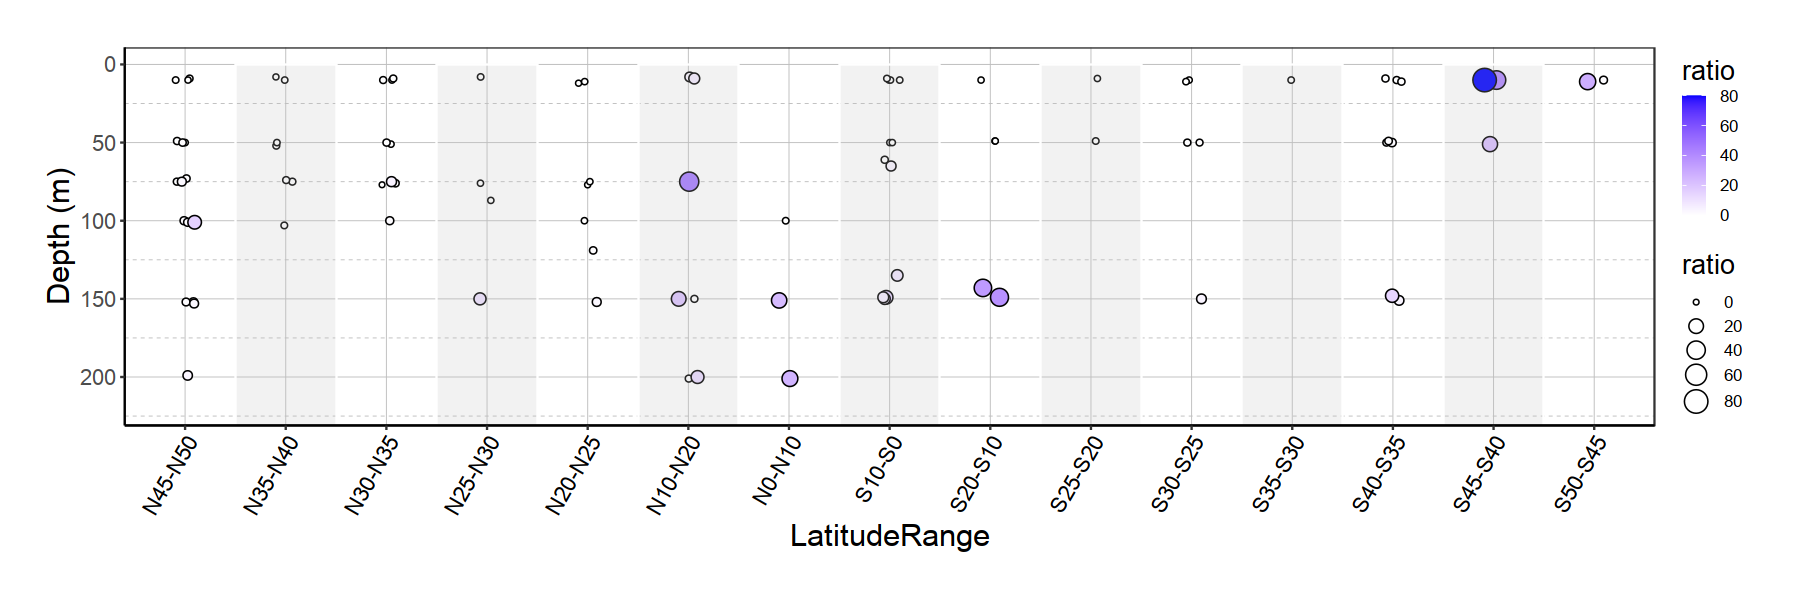

In [400]:
options(repr.plot.width=15, repr.plot.height=5)

ggplot(data=cyanophage_cyano_meta_df, mapping=aes(x=LatitudeRange, y=Depth, fill=ratio)) + 
  geom_point(aes(size=ratio), color="black", pch = 21, position = position_jitterdodge(0.2)) + 
  scale_y_reverse(lim=c(220, 0)) + ylab("Depth (m)") +
  geom_rect(data=rects_7, mapping=aes(xmin=xmin, xmax=xmax, ymin = 0, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  scale_fill_gradient(low = 'white', high = 'blue') +
  #scale_color_gradient2(low = 'blue', mid = 'white', high = 'red') +
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1), legend.position = "right") 

ggsave(filename="bioGEOTRACES_DEF_Class_Percentages_GA02_cyanophage_ratio_dotplot_v1.pdf", 
       plot = last_plot(), path="./", useDingbats=FALSE,
       scale = 1, width = 300, height = 100, units = "mm",
       dpi = 300, limitsize = FALSE)